# Sesión 3: Introducción al Análisis de Regresión

Curso: Análisis de datos

Phd (c) Melanie Oyarzún - <melanie.oyarzun@udd.cl> (Magíster en Data
Science - Universidad del Desarrollo)

# Visión general al análisis de regresión

En las aplicaciones de la ciencia de datos, es muy común estar
interesado en la relación entre dos o más variables.

El análisis de regresión es una técnica en la cual buscamos encontrar
una función que pueda describir la relación observada en los datos entre
dos o mas variables.

Por ejemplo, una persona podría querer relacionar los pesos de los
individuos con sus alturas…

-   ¿Son los más altos más pesados?
-   …y¿cuánto más pesados?

Pensemos en el caso más sencillo: una **regresión lineal simple** o
univariada. Tenemos una variable que deseamos explicar o predecir (Y)
como función de otra (X).

Para esto, buscamos la pendiente e intercepto de una funciónla recta de
la forma:

$$Y = \alpha + \beta X$$

que se ajuste mejor al conjunto de datos con los que se cuenta.

donde $X$ es la variable explicativa e $Y$ es la variable dependiente.
La pendiente de la recta es $b$, y $a$ es la intersección (el valor de
$y$ cuando $x = 0$).

<img src="./img/img_sesion3/gif_regresion2.gif" width="600">

Para esto, entendemos que la variable que deseamos entender (Y, variable
dependiente) se puede descomponer en dos partes: una que es sistemática
o que se puede explicar directamente con una o más variables
independientes (Xs o regresores) y otra que es no sistemática o error
($\mu$ o $epsilon$) , que es aquella parte que no se puede explicar y
representa a la aleatoriedad del fenómeno.

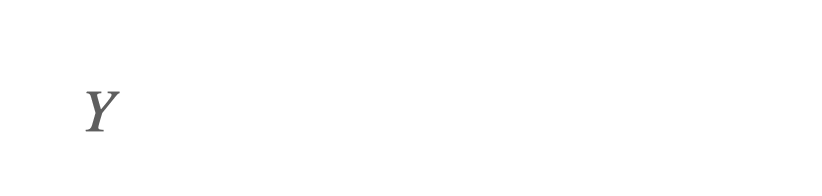

La parte sistemática entonces la describimos con una forma funcional,
que depende de otras variables o regresores.

Esta forma funcional puede ser lineal univariada, lineal múltiple o no
lineal. El tipo de forma funcional, definirá el tipo de regresión de la
que estemos hablando.

Ventajas del análisis de regersión: es facil describir cuantitaivamente
una relación.

Esquemáticamente, los elementos son:

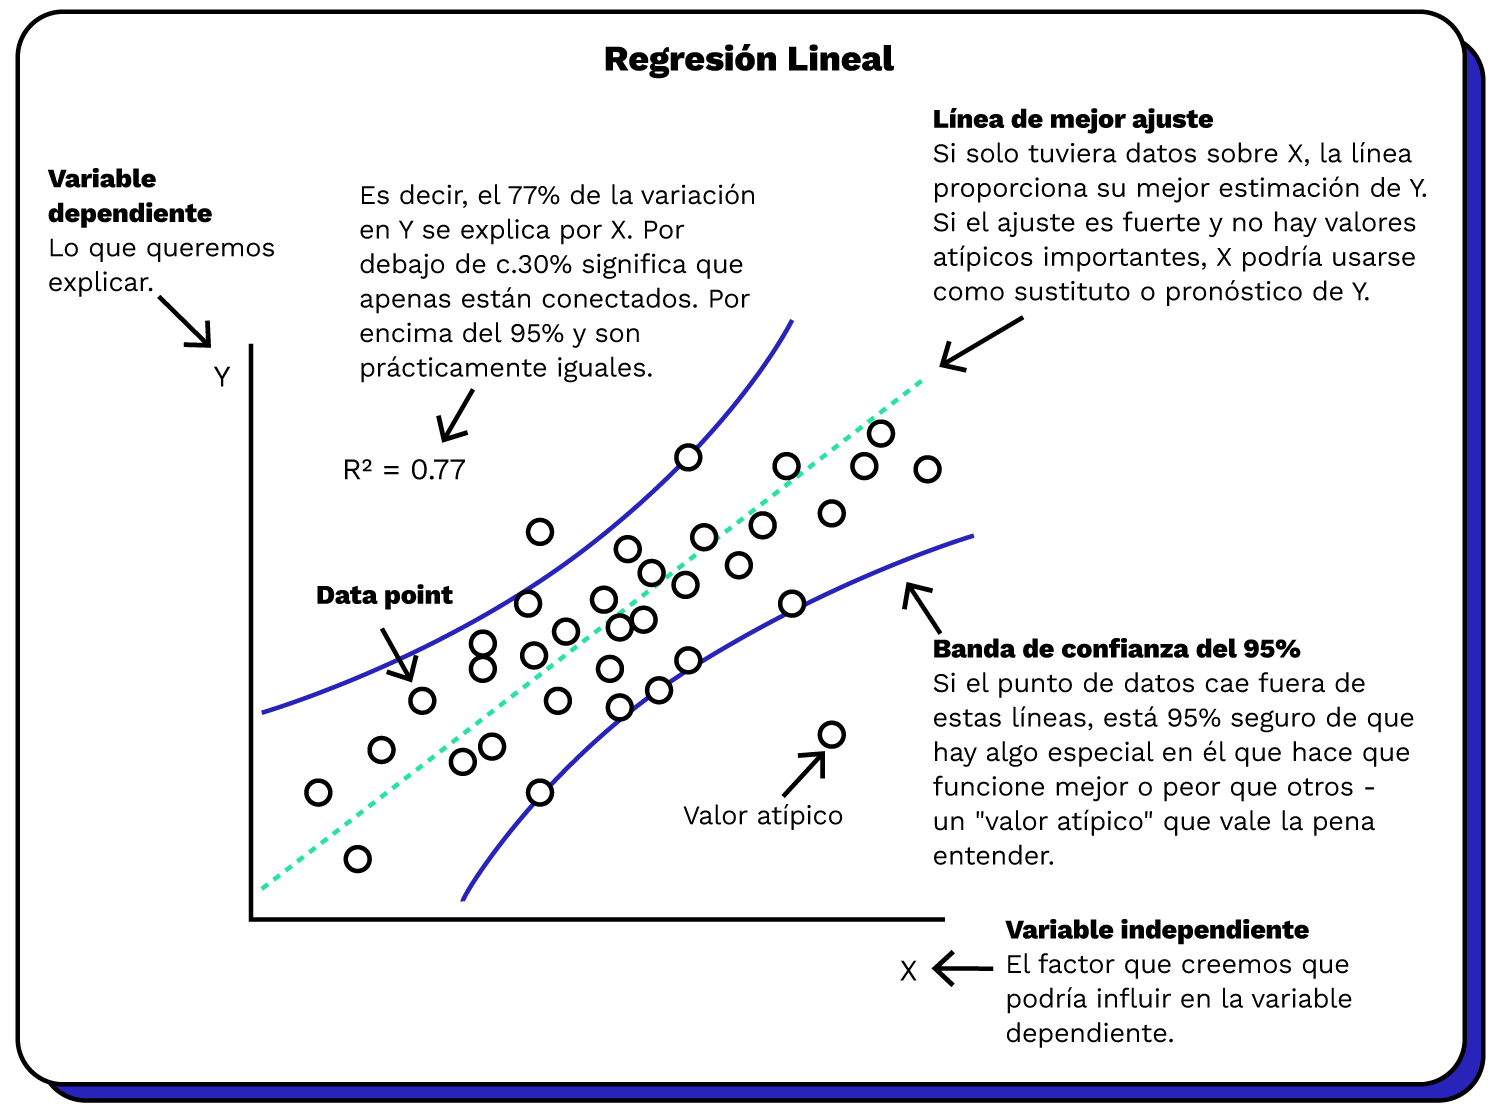

## Usos de las regresiones

Las regresiones tienen tres principales usos:

-   Describir un fenómeno
-   Probar hipótesis sobre ciertas teorías
-   Realizar predicciones

## Regresión simple y scatterplot

Por ejemplo, pensemos en la relación entre los años de educación y el
ingreso de las personas. Este ha sido un tema constante de estudio en
diversas disciplinas, especialmente economía.

Podriamos pensar que ambas variables se encuentras relacionadas.

Usemos un subconjunto de datos de la encuesta CASEN 2022.

In [1]:
import pandas as pd
# cargamos los datos, es un subconjunto de pregungas, solo mayores de 18 años

casen_2022 = pd.read_stata("data/small_casen2022.dta")
# casen_2022 = pd.read_stata("https://github.com/melanieoyarzun/web_analisisdatos_IDS_S223/blob/main/data/small_casen2022.dta)

casen_2022.head()

Y lo agrparemos por ragion, para facilitar el ejemplo:

In [2]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'data' con las columnas 'region', 'ytrabajocor', 'esc' y 'desercion'

# Agrupar por 'region' y aplicar funciones de agregación
casen_2022_region = casen_2022.groupby('region').agg({'ytrabajocor': 'mean', 'esc': 'mean'}).reset_index()

# Ahora contiene los resultados agregados por región

casen_2022_region.head()

Realicemos un scatter sencillo:

## matplotlib

``` python
import matplotlib.pyplot as plt

# Suponiendo que casen_2022 es tu DataFrame
plt.scatter( casen_2022_region['esc'], casen_2022_region['ytrabajocor'],)
plt.ylabel('ytrabajocor')
plt.xlabel('esc')
plt.title('Scatter Plot entre ytrabajocor y esc (por región)')
plt.show()
```

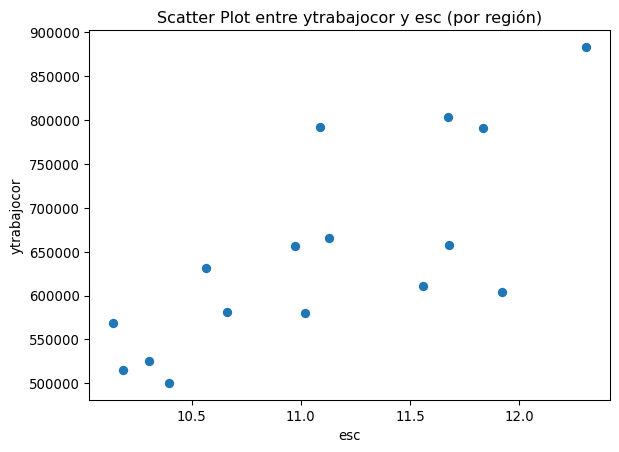

## seaborn

``` python
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que casen_2022 es tu DataFrame
sns.scatterplot(data=casen_2022_region, y='ytrabajocor', x='esc')
plt.ylabel('ytrabajocor')
plt.xlabel('esc')
plt.title('Scatter Plot entre ytrabajocor y esc')
plt.show()
```

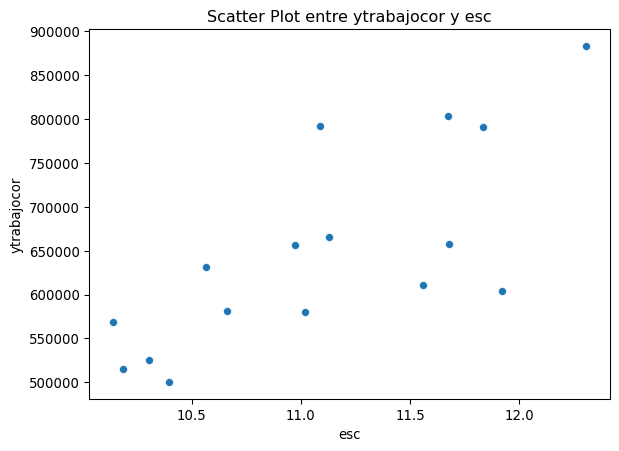

## seaborn + linea de regresion

``` python
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que casen_2022 es tu DataFrame
sns.regplot(data=casen_2022_region, y='ytrabajocor', x='esc', ci=95, line_kws={'color': 'magenta'})  # El argumento ci controla el intervalo de confianza
plt.ylabel('ytrabajocor')
plt.xlabel('esc')
plt.title('Scatter Plot con Línea de Regresión y Intervalo de Confianza')
plt.show()
```

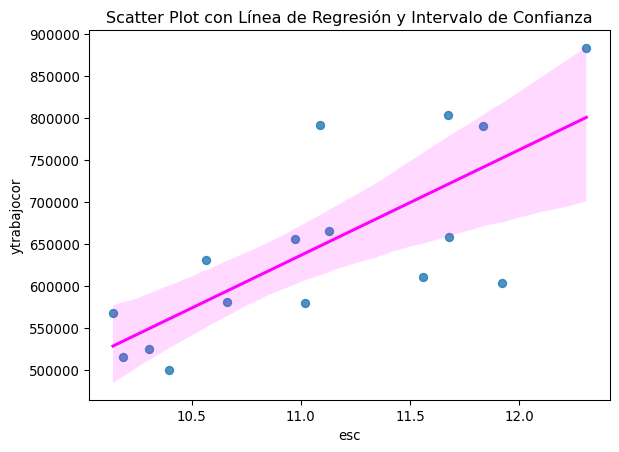

## Con codigos de region

``` python
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que casen_2022_region es tu DataFrame
sns.regplot(data=casen_2022_region, y='ytrabajocor', x='esc', ci=95, line_kws={'color': 'magenta'})  # El argumento ci controla el intervalo de confianza

# Procesar y agregar etiquetas de región a los puntos
for i, label in enumerate(casen_2022_region['region']):
    last_word = label.split()[-1]  # Obtener la última palabra de la etiqueta
    plt.text(casen_2022_region['esc'][i], casen_2022_region['ytrabajocor'][i], last_word, fontsize=8, ha='left', va='bottom')

plt.ylabel('ytrabajocor')
plt.xlabel('esc')
plt.title('Scatter Plot con Línea de Regresión y Etiquetas de Región (Última Palabra)')
plt.show()
```

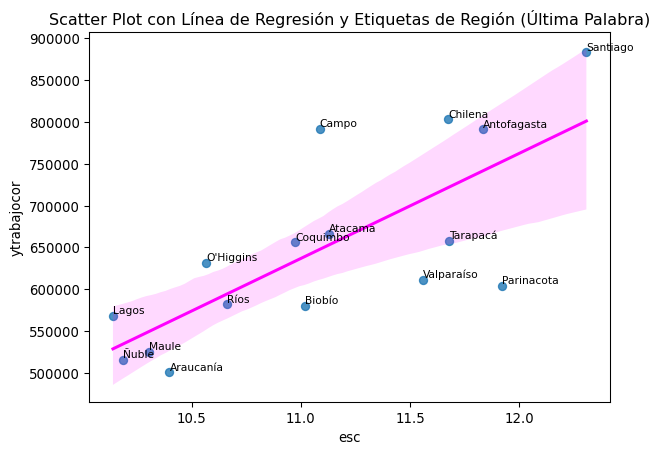

Podemos ver que se aprecia una relación positiva: a mayor escolaridad
promedio, mayor salario promedio por región.

## Especificación

Llamamos especifiación al precisar la relación entre las variables que
deseamos estimar.

En nuestro caso, la función base que queremos entender es entre salario
y educación:

$$ \text{Salario} = f(Educacion))$$

Este es una relación teorica entre variables aleatorias, porque no hemos
especificado tres elementos cruciales: - agregar el error aleatorio -
especificar una forma funcional - definir una forma de medir las
variables en los datos

En nuestro caso, entonces el modelo especificado sería:

$$ \text{ingreso del trabajo}_i = \alpha + \beta \text{años educación}_i + \mu_i$$

## Interpretación

Con nuestro modelo especificado:

$$ \text{ingreso del trabajo}_i = \alpha + \beta \text{años educación}_i + \mu_i$$

Podemos interpretar $\beta$ y $alpha$:

-   $\beta = \frac{\partial ingr}{\partial educ}$: un año adiciónal de
    educación, en cuanto incrementa el salario (si nada más cambia)

-   $\alpha$ valor esperado de y, si x=0…

## Modelo poblaciónal y estimación

Este modelo especificado esta definido en la población:

$$ \text{ingreso del trabajo}_i = \alpha + \beta \text{años educación}_i + \mu_i$$

pero necesitamos calcularlo con la muestra…. por lo cual tenemos
estimadores para los coeficientes poblacionales!

$$\hat{ \text{ingreso del trabajo}}_i = \hat{\alpha} + \hat{\beta} \text{años educación}_i $$

## Modelo poblaciónal y estimación

El método más comun de estimación es el de los **mínimos cuadrados
ordinarios**. Veremos detalles sobre la estimación, supuestos,
propiedades estadísticas la proxima sesión.

Por ahora, pensaremos que es el método que busca la línea que produce
menores residuos, es decir, menor diferencia entre evalor predicho
(linea de regresión).

$$ \hat{\mu}_i= y_i-\hat{y}_i$$

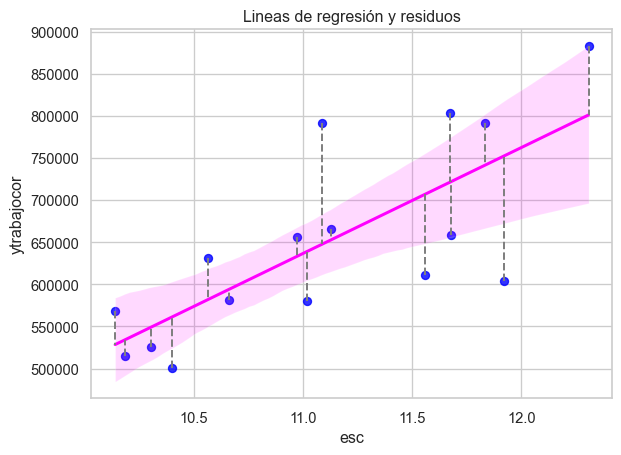

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Suponiendo que casen_2022_region es tu DataFrame
sns.set(style='whitegrid')  # Configuración del estilo del gráfico

# Agregar una columna de constante al DataFrame
casen_2022_region['constante'] = 1

# Crear el gráfico de dispersión con la línea de regresión
sns.regplot(data=casen_2022_region, y='ytrabajocor', x='esc', ci=95, line_kws={'color': 'magenta'}, scatter_kws={'color': 'blue'})  # El argumento ci controla el intervalo de confianza

# Ajustar el modelo de regresión lineal
y = casen_2022_region['ytrabajocor']
X = casen_2022_region[['esc', 'constante']]  # 'constante' es la columna que agregamos para el término constante
modelo = sm.OLS(y, X).fit()

# Calcular las predicciones ('ytrabajocor_pred') a partir del modelo
casen_2022_region['ytrabajocor_pred'] = modelo.predict(X)

# Agregar líneas que conecten cada punto a la línea de regresión
for i in range(len(casen_2022_region)):
    x_point = casen_2022_region['esc'][i]
    y_point = casen_2022_region['ytrabajocor'][i]
    y_pred = casen_2022_region['ytrabajocor_pred'][i]  # Usamos las predicciones del modelo
    
    # Línea que conecta el punto a la línea de regresión
    plt.plot([x_point, x_point], [y_point, y_pred], linestyle='--', color='gray')

plt.ylabel('ytrabajocor')
plt.xlabel('esc')
plt.title('Lineas de regresión y residuos')
plt.show()

Es decir, minimiza \$\_{i}^{n} \_i \$

## Modelo estimado

Por ahora, solo estimaremos el modelo directamente usando statsmodels

## Agrupados por región

``` python
import pandas as pd
import statsmodels.api as sm

# Supongamos que 'casen_2022' contiene las columnas 'ytrabajocor' (variable dependiente) y 'esc' (variable independiente),
# y que puedes tener valores NaN en tus datos.

# Eliminar filas con valores NaN
casen_2022_clean = casen_2022_region.dropna(subset=['ytrabajocor', 'esc'])

# Agregar una columna de constantes para el término constante en el modelo
casen_2022_clean['constante'] = 1

# Definir las variables dependiente e independiente
y = casen_2022_clean['ytrabajocor']
X = casen_2022_clean[['constante', 'esc']]  # Usar 'constante' como término constante

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(modelo.summary())
```

                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:            ytrabajocor   R-squared:                       0.563
    Model:                            OLS   Adj. R-squared:                  0.532
    Method:                 Least Squares   F-statistic:                     18.07
    Date:                Sat, 09 Sep 2023   Prob (F-statistic):           0.000808
    Time:                        11:34:16   Log-Likelihood:                -201.85
    No. Observations:                  16   AIC:                             407.7
    Df Residuals:                      14   BIC:                             409.3
    Df Model:                           1                                         
    Covariance Type:            nonrobust                                         
    ==============================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------
    constante  -7.467e+05   3.29e+05     -2.272      0.039   -1.45e+06   -4.17e+04
    esc         1.258e+05   2.96e+04      4.250      0.001    6.23e+04    1.89e+05
    ==============================================================================
    Omnibus:                        0.030   Durbin-Watson:                   1.473
    Prob(Omnibus):                  0.985   Jarque-Bera (JB):                0.151
    Skew:                          -0.072   Prob(JB):                        0.927
    Kurtosis:                       2.547   Cond. No.                         189.
    ==============================================================================

    Notes:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

    /Users/melita/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning:

    kurtosistest only valid for n>=20 ... continuing anyway, n=16

## Todos los datos

``` python
import pandas as pd
import statsmodels.api as sm

# Supongamos que 'casen_2022' contiene las columnas 'ytrabajocor' (variable dependiente) y 'esc' (variable independiente),
# y que puedes tener valores NaN en tus datos.

# Eliminar filas con valores NaN
casen_2022_clean = casen_2022.dropna(subset=['ytrabajocor', 'esc'])

# Agregar una columna de constantes para el término constante en el modelo
casen_2022_clean['constante'] = 1

# Definir las variables dependiente e independiente
y = casen_2022_clean['ytrabajocor']
X = casen_2022_clean[['constante', 'esc']]  # Usar 'constante' como término constante

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(modelo.summary())
```

                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:            ytrabajocor   R-squared:                       0.135
    Model:                            OLS   Adj. R-squared:                  0.135
    Method:                 Least Squares   F-statistic:                 1.371e+04
    Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
    Time:                        11:34:16   Log-Likelihood:            -1.3153e+06
    No. Observations:               87910   AIC:                         2.631e+06
    Df Residuals:                   87908   BIC:                         2.631e+06
    Df Model:                           1                                         
    Covariance Type:            nonrobust                                         
    ==============================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------
    constante  -2.701e+05   8430.418    -32.035      0.000   -2.87e+05   -2.54e+05
    esc         7.707e+04    658.196    117.100      0.000    7.58e+04    7.84e+04
    ==============================================================================
    Omnibus:                   165004.626   Durbin-Watson:                   1.657
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1073370403.828
    Skew:                          13.789   Prob(JB):                         0.00
    Kurtosis:                     543.626   Cond. No.                         42.3
    ==============================================================================

    Notes:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

    /var/folders/ry/0yrdh5kn1m92t_pmx56nnqkc0000gn/T/ipykernel_44152/626282569.py:11: SettingWithCopyWarning:


    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Podemos ver que un año adicional de educación ase asocia con
126.000/77.000 app pesos mensuales, el resto constante.

¿y la constante, como la podemos interpretar?

## Modelos simples y múltiples

Muchas veces una sola variable no es suficiente para describir bien un
fenómeno. Necesitamos incluir más variables.

Esto puede ser: - Una nueva variable - Una forma funcional no lineal de
la variable ya incluida

Nuestra interpretación del modelo no cambia, solo que ahora
efectivamente estamos **controlando** por otros factores.

Probemos, agregar edad al modelo:

In [10]:
import pandas as pd
import statsmodels.api as sm

# Supongamos que 'casen_2022' contiene las columnas 'ytrabajocor' (variable dependiente) y 'esc' (variable independiente),
# y que puedes tener valores NaN en tus datos.

# Eliminar filas con valores NaN
casen_2022_clean = casen_2022.dropna(subset=['ytrabajocor', 'esc', 'edad'])

# Agregar una columna de constantes para el término constante en el modelo
casen_2022_clean['constante'] = 1

# Definir las variables dependiente e independiente
y = casen_2022_clean['ytrabajocor']
X = casen_2022_clean[['constante', 'esc', 'edad']]  # Usar 'constante' como término constante

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:            ytrabajocor   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     7754.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:34:16   Log-Likelihood:            -1.3145e+06
No. Observations:               87910   AIC:                         2.629e+06
Df Residuals:                   87907   BIC:                         2.629e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constante   -7.37e+05   1.45e+04    -50.839      0.0

/var/folders/ry/0yrdh5kn1m92t_pmx56nnqkc0000gn/T/ipykernel_44152/2633333245.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Es muy usual, agregar edad al cuadrado…. para representar que los
salarios crecen con la edad hasta cierto punto, y luego empieza a
decaer…

In [11]:
import pandas as pd
import statsmodels.api as sm

# Supongamos que 'casen_2022' contiene las columnas 'ytrabajocor' (variable dependiente), 'esc' (variable independiente),
# 'edad' (variable independiente) y puedes tener valores NaN en tus datos.

# Eliminar filas con valores NaN
casen_2022_clean = casen_2022.dropna(subset=['ytrabajocor', 'esc', 'edad'])

# Agregar una columna de constantes para el término constante en el modelo
casen_2022_clean['constante'] = 1

# Agregar una columna con 'edad' al cuadrado
casen_2022_clean['edad_cuadrado'] = casen_2022_clean['edad'] ** 2

# Definir las variables dependiente e independiente
y = casen_2022_clean['ytrabajocor']
X = casen_2022_clean[['constante', 'esc', 'edad', 'edad_cuadrado']]  # Incluye 'edad_cuadrado'

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(modelo.summary())

/var/folders/ry/0yrdh5kn1m92t_pmx56nnqkc0000gn/T/ipykernel_44152/847230214.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ry/0yrdh5kn1m92t_pmx56nnqkc0000gn/T/ipykernel_44152/847230214.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                            OLS Regression Results                            
Dep. Variable:            ytrabajocor   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5454.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:34:16   Log-Likelihood:            -1.3142e+06
No. Observations:               87910   AIC:                         2.628e+06
Df Residuals:                   87906   BIC:                         2.628e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
constante     -1.273e+06   2.46e+04    -51.789

## Un poco más sobre interpretación

Los principales elementos que hay que interpretar en un modelo de
regresión lineal son los coeficientes de los predictores:

-   $\beta_0$ es la ordenada en el origen o intercept, se corresponde
    con el valor esperado de la variable respuesta $y$, cuando todos los
    predictores son cero.

-   $\beta_j$ los coeficientes de regresión parcial de cada predictor
    **indican el cambio promedio esperado de la variable respuesta 𝑦 al
    incrementar en una unidad de la variable predictora $x_j$,
    manteniéndose constantes el resto de variables. (“Ceteris
    paribus”))**

La magnitud de cada coeficiente parcial de regresión depende de las
unidades en las que se mida la variable predictora a la que corresponde,
por lo que su magnitud no está asociada con la importancia de cada
predictor.

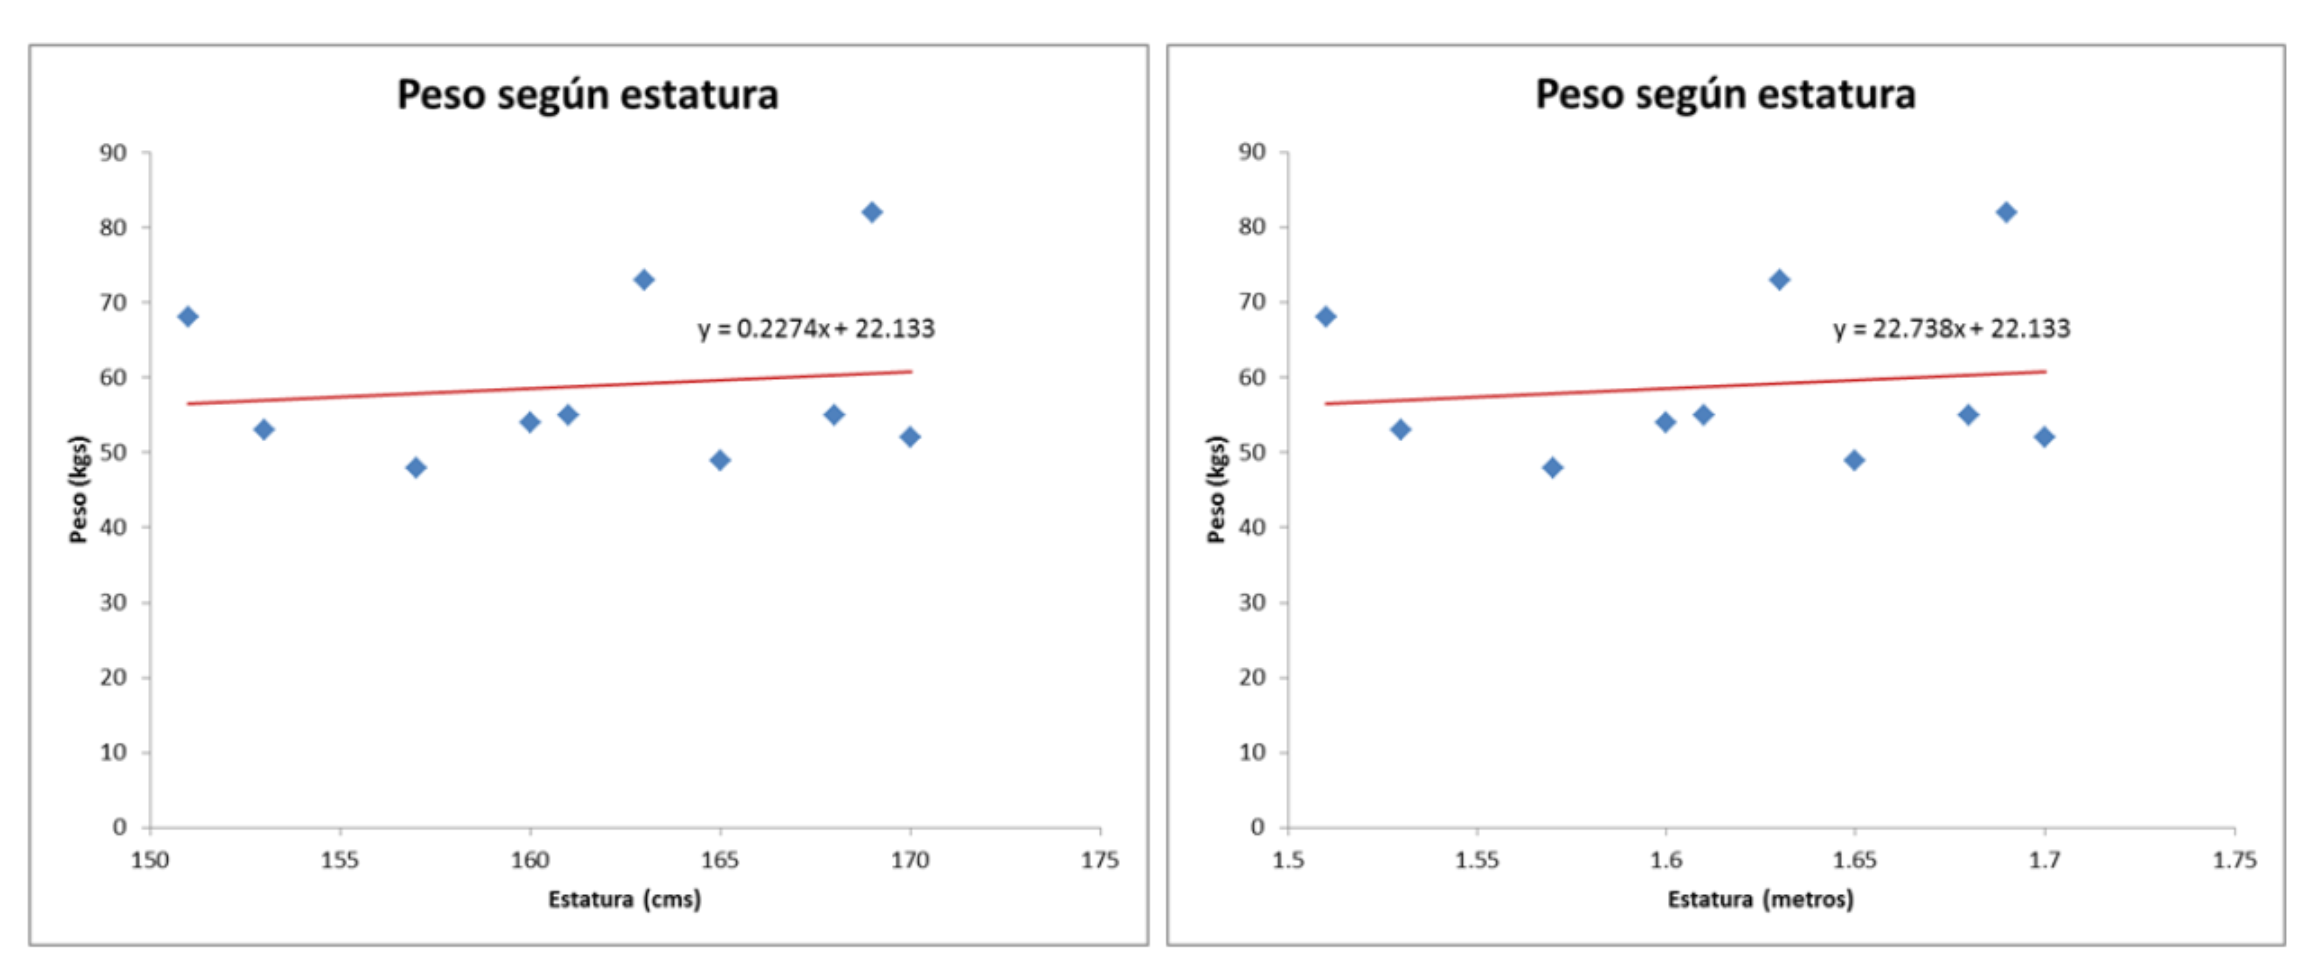

Para poder determinar qué impacto tienen en el modelo cada una de las
variables, se emplean los coeficientes parciales estandarizados, que se
obtienen al estandarizar (sustraer la media y dividir entre la
desviación estándar) las variables predictoras previo ajuste del modelo.
En este caso, $\beta_0$ se corresponde con el valor esperado de la
variable respuesta cuando todos los predictores se encuentran en su
valor promedio, y $\beta_j$ el cambio promedio esperado de la variable
respuesta al incrementar en una desviación estándar la variable
predictora $x_j$, manteniéndose constantes el resto de variables.

Si bien los coeficientes de regresión suelen ser el primer objetivo de
la interpretación de un modelo lineal, existen muchos otros aspectos
(significancia del modelo en su conjunto, significancia de los
predictores, condición de normalidad…etc.). Estos últimos suelen ser
tratados con poco detalle cuando el único objetivo del modelo es
realizar predicciones, sin embargo, son muy relevantes si se quiere
realizar inferencia, es decir, explicar las relaciones entre los
predictores y la variable respuesta.

## Causalidad, regresión y correlación

**Importante tener en cuenta**

Antes de intentar ajustar un modelo lineal a los datos observados, la
persona debe determinar primero si existe o no una relación entre las
variables de interés. Esto no implica necesariamente que una variable
**cause** la otra (por ejemplo, puntajes más altos en la PSU **no
causan** calificaciones superiores en la universidad), pero existe
alguna asociación significativa entre las dos variables.

Un diagrama de dispersión puede ser una herramienta útil para determinar
la fuerza de la relación entre dos variables. Si parece no haber
asociación entre las variables explicativas y dependiente propuestas (es
decir, el diagrama de dispersión no indica ninguna tendencia creciente o
decreciente), entonces ajustar un modelo de regresión lineal a los datos
probablemente no proporcionará un modelo útil.

Una valiosa medida numérica de asociación entre dos variables es el
coeficiente de correlación, que es un valor entre -1 y 1 que indica la
fuerza de la asociación de los datos observados para las dos variables.

# Una perspectiva histórica:

EL origen de la técnica, podemos remontarlo a la genética.

Francis Galton estudió la variación y la herencia de los rasgos humanos.
Entre muchos otros rasgos, Galton recolectó y estudió datos de altura de
familias para tratar de entender la herencia. **Mientras hacía esto,
desarrolló los conceptos de correlación y regresión.**

Por supuesto, en el momento en que se recogieron estos datos, nuestro
conocimiento de la genética era bastante limitado en comparación con lo
que conocemos hoy en día. Una pregunta muy específica que Galton trató
de responder fue:

    ¿qué tan bien podemos predecir la estatura de un niño basado en la estatura de los padres? 

La técnica que desarrolló para responder a esta pregunta, la regresión,
también puede aplicarse en muchas otras circunstancias.

Nota histórica: Galton hizo importantes contribuciones a la estadística
y la genética, pero también fue uno de los primeros defensores de la
eugenesia, un movimiento filosófico científicamente defectuoso
favorecido por muchos biólogos de la época de Galton pero con terribles
consecuencias históricas.

<img src="./img/img_sesion3/galton.png" width="350">

## Estudio de caso: ¿es hereditaria la altura?

Tenemos acceso a los datos de altura de familias recolectado por Galton,
a través del paquete `HistData`. Estos datos contienen las alturas de
varias docenas de familias: madres, padres, hijas e hijos.

In [12]:
# Cargamos los paquetes que vamos a usar
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns

# Si no tiene stats models, instalar: pip install statsmodels

# Cargar el conjunto de datos GaltonFamilies
galton_data = sm.datasets.get_rdataset("GaltonFamilies", package="HistData").data

# Mostrar las primeras filas del DataFrame
galton_data.head(4)

Para imitar el análisis de Galton, crearemos un conjunto de datos con
las alturas de los padres y un hijo de cada familia seleccionado al
azar:

In [13]:
# Filtrar por género masculino y seleccionar una muestra de una altura de hijo por familia
galton_heights = galton_data[galton_data['gender'] == 'male']\
    .groupby('family')\
    .apply(lambda group: group.sample(n=1))\
    .reset_index(drop=True)\
    .loc[:, ['father', 'childHeight']]\
    .rename(columns={'childHeight': 'son'})

galton_heights.head(4)

En los ejercicios, examinaremos otras relaciones, incluidas las de
madres e hijas.

Supongamos que se nos pidiera que resumiéramos (describieramos) los
datos de padres e hijos. Dado que ambas distribuciones están bien
aproximadas por la distribución normal, podríamos usar los dos promedios
y dos desviaciones estándar como resúmenes:

In [14]:
promedio_padre = galton_heights['father'].mean()
sd_padre = galton_heights['father'].std()
promedio_hijo = galton_heights['son'].mean()
sd_hijo = galton_heights['son'].std()

resumen_estadistico = pd.DataFrame({
    'promedio_padre': [promedio_padre],
    'sd_padre': [sd_padre],
    'promedio_hijo': [promedio_hijo],
    'sd_hijo': [sd_hijo]
})

resumen_estadistico.head()

Sin embargo, este resumen no describe una característica importante de
los datos: **la tendencia de que cuanto más alto es el padre, más alto
es el hijo.**

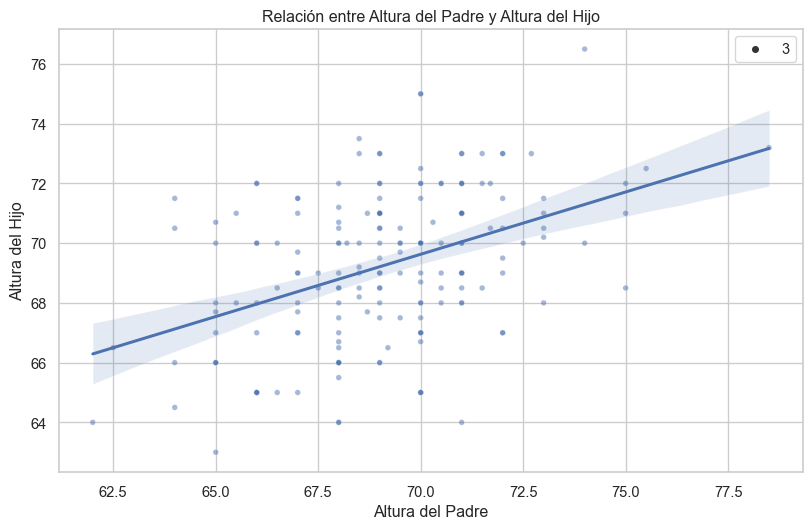

In [15]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Cargar el conjunto de datos GaltonFamilies
galton_data = sm.datasets.get_rdataset("GaltonFamilies", package="HistData").data

# Filtrar por género masculino y seleccionar una muestra de una altura de hijo por familia
galton_heights = galton_data[galton_data['gender'] == 'male']\
    .groupby('family')\
    .apply(lambda group: group.sample(n=1))\
    .reset_index(drop=True)\
    .loc[:, ['father', 'childHeight']]\
    .rename(columns={'childHeight': 'son'})

# Crear el gráfico de dispersión con línea de regresión
sns.set(style="whitegrid")
sns.scatterplot(data=galton_heights, x='father', y='son', alpha=0.5, size=3)
sns.regplot(data=galton_heights, x='father', y='son', scatter=False)

plt.xlabel("Altura del Padre")
plt.ylabel("Altura del Hijo")
plt.title("Relación entre Altura del Padre y Altura del Hijo")

# Mostrar el gráfico
plt.show()

Aprenderemos que el **coeficiente de correlación** es un resumen
informativo de cómo dos variables se mueven juntas y luego veremos cómo
esto puede ser usado para predecir una variable usando la otra, en **una
regresión**.

## Taller de aplicación 2: Caso aplicación: Cursos de Verano

> ****Taller de aplicación 2: Pregunta 1****
>
> Considere los datos trabajados en el taller 1, sobre los cursos de
> verano. Recordemos la pregunta que queríamos responder:
>
> > Asistir a cursos de verano mejora los resultados académicos?
>
> 1.  Plantee un modelo de regresión que con los datos disponibles
>     quisieramos estimar.
> 2.  Grafique la dispersión y la recta de regresión estimada.
> 3.  Estime el modelo simple e interprete

## ¿Regresión?… pero ¿Y la correlación?

-   Ambos están muy relacionados.
-   Aprenderemos que el coeficiente de correlación es un resumen
    informativo de cómo dos variables se mueven juntas…
-   y luego veremos cómo esto puede ser usado para predecir una variable
    usando la otra y modelado en una regresión

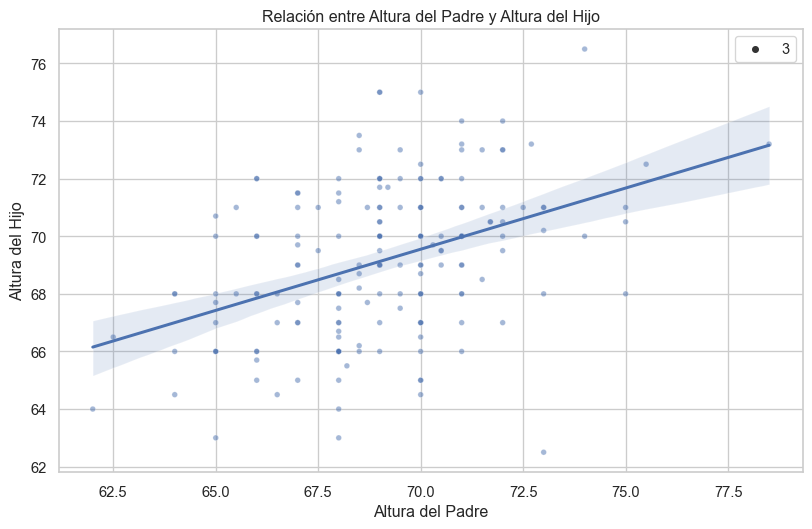

## El coeficiente de correlación

El coeficiente de correlación se define para una lista de pares
$(x_1,y_1),...(x_n,y_n)$ como la media de los productos de los valores
normalizados:

$$
\rho = \frac{1}{n}\sum_{i=1}^{n} \big(\frac{x_i-\mu_x }{\sigma_x}\big)\big(\frac{y_i-\mu_y}{\sigma_y}\big)
$$

Dónde $\mu$ son promedios y $\sigma$ son desviaciones estándar. La letra
griega para r, $\rho$ se utiliza comúnmente en los libros de estadística
para denotar la correlación, porque es la primera letra de regresión.
Pronto aprenderemos sobre la conexión entre correlación y regresión.

Podemos representar la fórmula anterior con el código usando:

`rho <- np.mean((x - np.mean(x)) * (y - np.mean(y))) / (np.std(x) * np.std(y))`

Podemos representar la fórmula anterior con el siguiente código usando:

In [17]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])  # Tu arreglo x aquí
y = np.array([6, 7, 8, 9, 10])  # Tu arreglo y aquí

rho = np.mean((x - np.mean(x)) * (y - np.mean(y))) / (np.std(x) * np.std(y))

print(rho)

0.9999999999999998

La correlación entre las alturas del padre y del hijo es de
aproximadamente $0,4$:

Media de la Altura del Padre (Estandarizada): 4.6046344887246715e-15
Desviación Estándar de la Altura del Padre (Estandarizada): 1.0
Media de la Altura del Padre: 69.09888268156423
Desviación Estándar de la Altura del Padre: 2.546555038637643

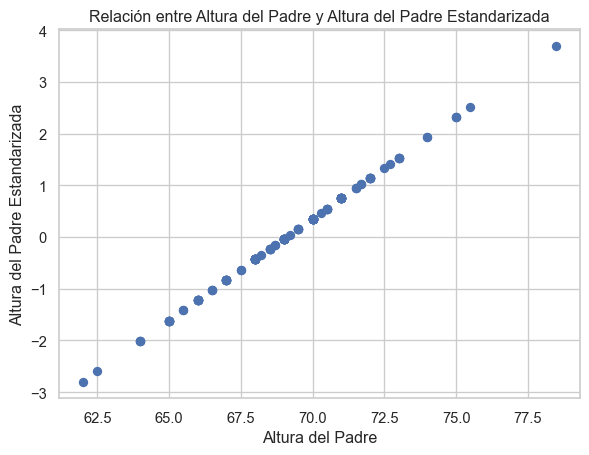

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos GaltonFamilies
galton_data = sm.datasets.get_rdataset("GaltonFamilies", package="HistData").data

# Filtrar por género masculino y seleccionar una muestra de una altura de hijo por familia
galton_heights = galton_data[galton_data['gender'] == 'male']\
    .groupby('family')\
    .apply(lambda group: group.sample(n=1))\
    .reset_index(drop=True)\
    .loc[:, ['father', 'childHeight']]\
    .rename(columns={'childHeight': 'son'})

# Calcular la media y la desviación estándar de la altura del padre
mean_scaled_father = StandardScaler().fit_transform(galton_heights[['father']]).mean()
sd_scaled_father = StandardScaler().fit_transform(galton_heights[['father']]).std()

mean_father = galton_heights['father'].mean()
sd_father = galton_heights['father'].std()

print("Media de la Altura del Padre (Estandarizada):", mean_scaled_father)
print("Desviación Estándar de la Altura del Padre (Estandarizada):", sd_scaled_father)
print("Media de la Altura del Padre:", mean_father)
print("Desviación Estándar de la Altura del Padre:", sd_father)

# Crear el gráfico de dispersión
plt.scatter(galton_heights['father'], StandardScaler().fit_transform(galton_heights[['father']]))
plt.xlabel("Altura del Padre")
plt.ylabel("Altura del Padre Estandarizada")
plt.title("Relación entre Altura del Padre y Altura del Padre Estandarizada")
plt.show()


La correlación entre las alturas del padre y del hijo es de
aproximadamente $0,4$.

In [19]:
correlation_coefficient = galton_heights[['father', 'son']].corr().iloc[0, 1]
print("Coeficiente de Correlación:", correlation_coefficient)

Coeficiente de Correlación: 0.4853442793373991

In [20]:
import pandas as pd

# Generar datos simulados usando la biblioteca faux
dat = pd.DataFrame(np.random.multivariate_normal([0, 0, 0, 0, 0, 0], np.diag([1, 1, 1, 1, 1, 1]), size=100),
                   columns=["A", "B", "C", "D", "E", "F"])

print(dat)

# Calcular la correlación entre father y son usando una muestra de galton_heights
R = galton_heights.sample(n=75, replace=True).corr().loc["father", "son"]
print(R)


           A         B         C         D         E         F
0   0.800051  0.749492 -0.457556 -1.346739  1.820692  1.307804
1  -0.655168 -0.689439 -1.859253 -1.055301 -0.038747  0.740963
2   0.246929  0.398858 -0.258189 -0.429937 -1.200393  1.179056
3  -1.126476 -1.194564  0.568520  0.382734 -0.749706  0.933305
4  -0.621384  0.889441 -0.433676 -0.018154 -0.637037  0.522555
..       ...       ...       ...       ...       ...       ...
95 -0.058599  0.111381 -1.999319  0.158927 -0.394381 -1.093226
96  1.471962  0.641055  1.068637 -1.137455  0.826449  3.134568
97 -1.891371 -2.542832 -0.668786 -0.251166  0.509007 -0.206379
98  0.206011 -1.542984 -0.085610 -1.677438 -0.356975 -0.135917
99  0.493786 -0.603331  0.846434 -0.141920 -0.364051  1.179819

[100 rows x 6 columns]
0.44835669992972704

Para ver cómo se ven los datos para los diferentes valores de $\rho$
aquí hay seis ejemplos de pares con correlaciones que van de -0,9 a
0,99:

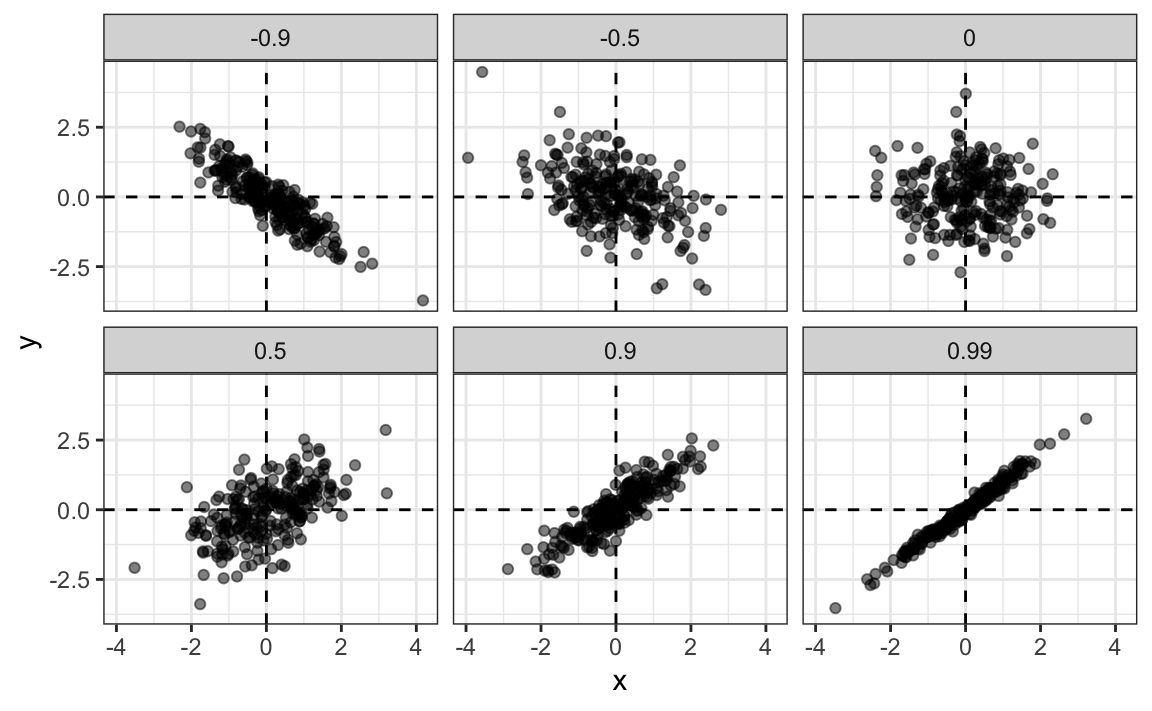

## La correlación de la muestra es una variable aleatoria

Antes de continuar conectando la correlación con la regresión,
recordemos la variabilidad aleatoria.

En la mayoría de las aplicaciones de la ciencia de datos, observamos
datos que incluyen **variación aleatoria**.

Por ejemplo, en muchos casos, no se observan datos para toda la
población de interés, sino para una muestra aleatoria. Al igual que con
el promedio y la desviación estándar, la **correlación de la muestra**
es la estimación más comúnmente utilizada de la **correlación de la
población**. Esto implica que la correlación que calculamos y usamos
como resumen es una variable aleatoria.

A modo de ejemplo, supongamos que las 179 parejas de padres e hijos son
toda nuestra población. Un genetista menos afortunado sólo puede costear
las mediciones de una muestra aleatoria de 25 pares. La correlación de
la muestra se puede calcular con:

In [21]:
import pandas as pd

# Seleccionar una muestra aleatoria de tamaño 75 con reemplazo
R = galton_heights.sample(n=75, replace=True)

# Calcular el coeficiente de correlación entre las columnas "father" y "son"
correlation_coefficient = R[['father', 'son']].corr().iloc[0, 1]

print("Coeficiente de Correlación en la Muestra:", correlation_coefficient)


Coeficiente de Correlación en la Muestra: 0.3435555116031788

R es una variable aleatoria. Podemos ejecutar una simulación de Monte
Carlo para ver su distribución:

-   Nota: el objetivo principal de la simulación de Montecarlo es
    intentar imitar el comportamiento de variables reales para, en la
    medida de lo posible, analizar o predecir cómo van a evolucionar.

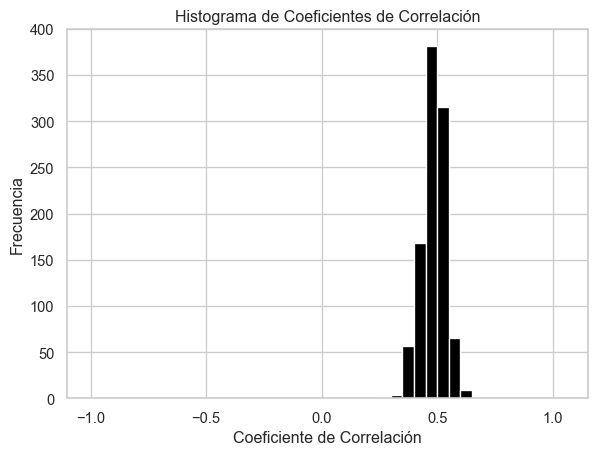

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

B = 1000
N = 100
R = np.zeros(B)

for i in range(B):
    sample = galton_heights.sample(n=N, replace=False)
    correlation_coefficient = sample[['father', 'son']].corr().iloc[0, 1]
    R[i] = correlation_coefficient

# Crear un histograma de los coeficientes de correlación
plt.hist(R, bins=np.arange(-1, 1.1, 0.05), color='black')
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Frecuencia")
plt.title("Histograma de Coeficientes de Correlación")
plt.show()

Vemos que el valor esperado de R es la correlación de la población:

In [23]:
mean_R = np.mean(R)
print("Media de Coeficientes de Correlación:", mean_R)

Media de Coeficientes de Correlación: 0.483799252422252

y que tiene un error estándar relativamente alto en relación con el
rango de valores que puede tomar R:

In [24]:
sd_R = np.std(R)
print("Desviación Estándar de Coeficientes de Correlación:", sd_R)

Desviación Estándar de Coeficientes de Correlación: 0.05014671095174608

Por lo tanto, al interpretar las correlaciones, recuerde que las
correlaciones derivadas de las muestras son estimaciones que contienen
incertidumbre.

Además, tenga en cuenta que debido a que la correlación de la muestra es
un promedio de extracciones independientes, el teorema del límite
central realmente funciona. Por lo tanto, para $N$ lo suficientemente
grande la distribución de $R$ es aproximadamente normal con el valor
esperado $\rho$. La desviación estándar, que es algo compleja de
derivar, es: $\sqrt{\frac{1-r^2}{N-2}}$.

En nuestro ejemplo, $N=25$ no parece ser lo suficientemente grande para
que la aproximación sea buena:

-   Nota: El gráfico Q-Q, o gráfico cuantitativo, es una herramienta
    gráfica que nos ayuda a evaluar si un conjunto de datos proviene
    plausiblemente de alguna distribución teórica como una Normal o
    exponencial. Por ejemplo, si realizamos un análisis estadístico que
    asume que nuestra variable dependiente está Normalmente distribuida,
    podemos usar un gráfico Q-Q-Normal para verificar esa suposición.
    https://data.library.virginia.edu/understanding-q-q-plots/

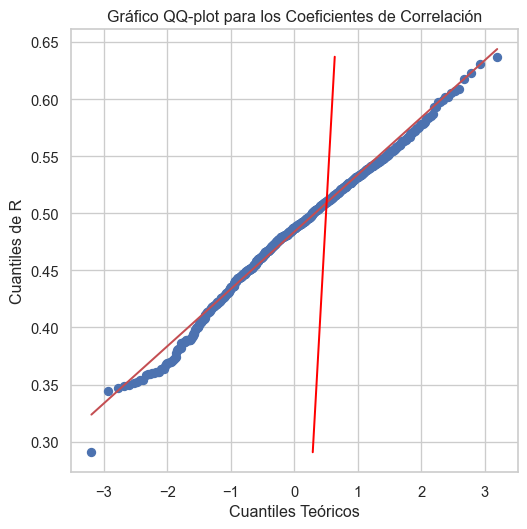

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Crear un DataFrame con los coeficientes de correlación
df_R = pd.DataFrame({'R': R})

# Calcular la media y el tamaño de la muestra
mean_R = np.mean(R)
N = len(R)

# Crear el gráfico QQ-plot
plt.figure(figsize=(6, 6))
stats.probplot(df_R['R'], dist='norm', plot=plt)
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles de R")
plt.title("Gráfico QQ-plot para los Coeficientes de Correlación")
plt.plot([np.min(R), np.max(R)], [np.min(R), np.max(R)], color='red')  # Línea de referencia
plt.show()

Si N aumenta verás que la distribución converge a una normal.

## La correlación no siempre es un resumen útil

La correlación no siempre es un buen resumen de la relación entre dos
variables. Los siguientes cuatro conjuntos de datos artificiales,
conocidos como el cuarteto de Anscombe, ilustran este punto. Todos estos
pares tienen una correlación de 0,82:

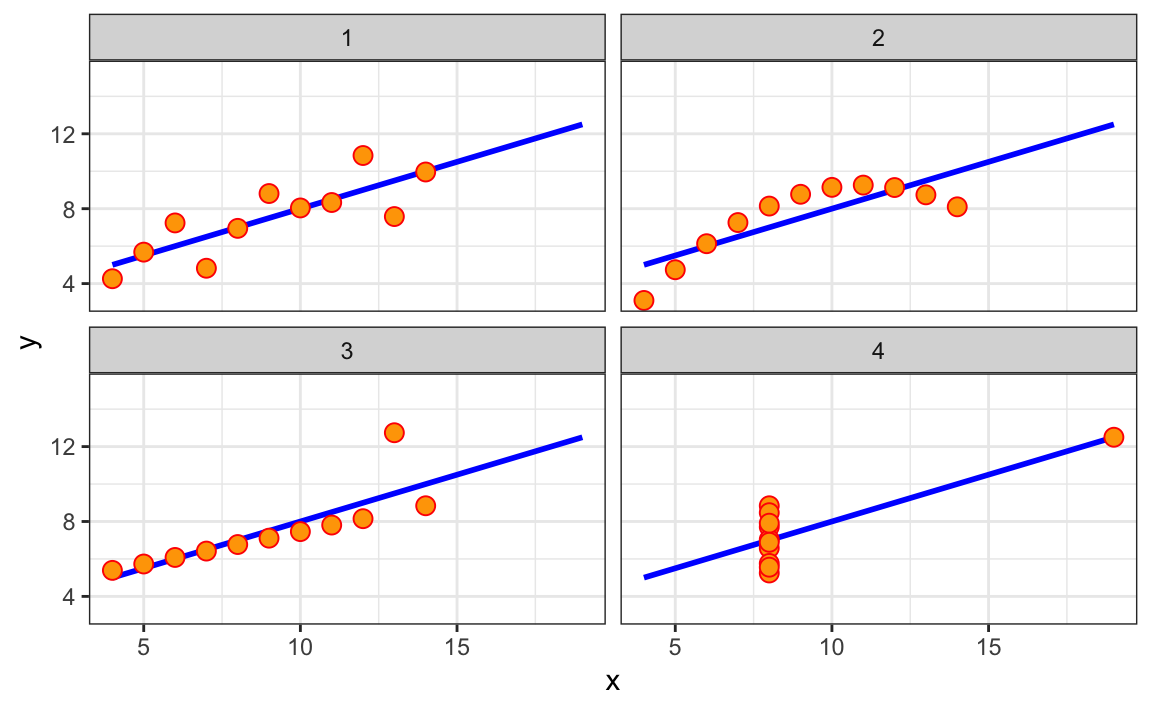

La correlación sólo tiene sentido en un contexto particular. Para
ayudarnos a entender cuándo es que la correlación es significativa como
estadística de resumen, volveremos al ejemplo de predecir la estatura
del hijo usando la estatura del padre. Esto ayudará a motivar y definir
la regresión lineal. Comenzamos demostrando cómo la correlación puede
ser útil para la predicción.

# Correlación no es causalidad

La asociación no es causalidad es quizás la lección más importante que
se aprende en una clase de estadística. Hay muchas razones por las que
una variable $X$ puede correlacionarse con una variable $Y$ sin tener
ningún efecto directo sobre $Y$. Aquí examinamos tres maneras comunes
que pueden llevar a una mala interpretación de los datos.

## Correlación espuria

El siguiente ejemplo cómico subraya que la correlación no es causalidad.
Muestra una fuerte correlación entre las tasas de divorcio y el consumo
de margarina.

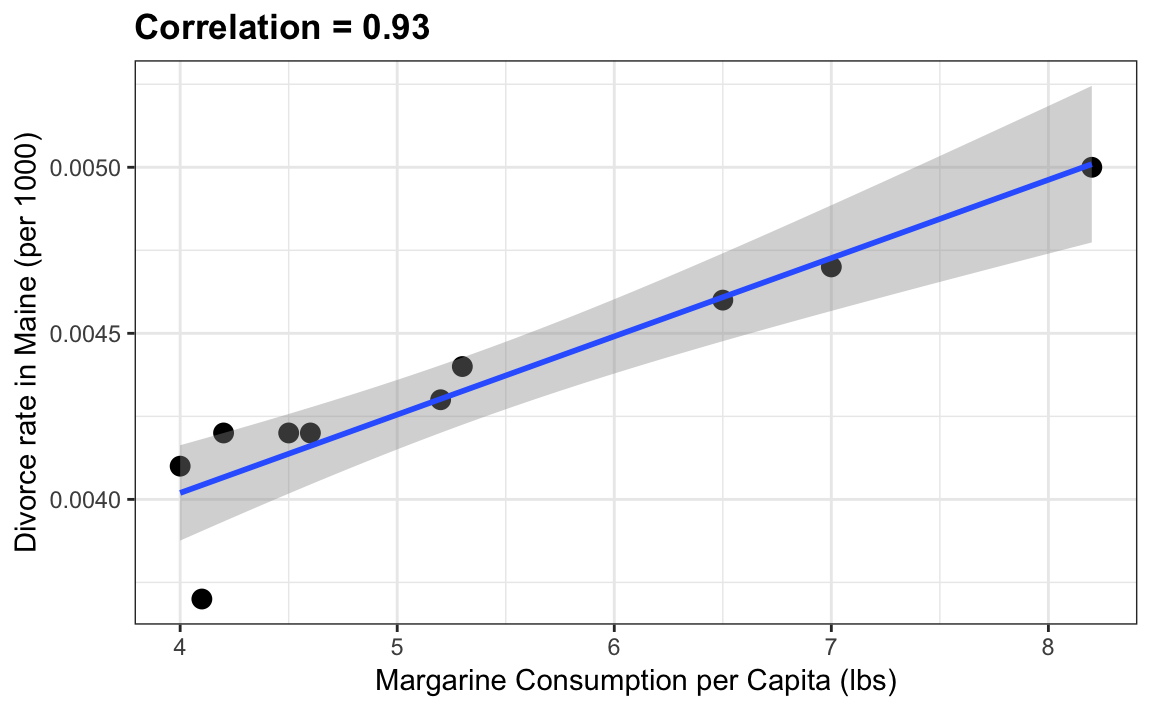

(Acá pueden encontrar más http://tylervigen.com/old-version.html)

¿Significa esto que la margarina causa divorcios? ¿O los divorcios hacen
que la gente coma más margarina? Por supuesto que la respuesta a estas
dos preguntas es no. Esto es sólo un ejemplo de lo que llamamos una
correlación espuria.

Los casos presentados en el sitio de correlación espuria son todos casos
de lo que generalmente se denomina dragado de datos (data dredging),
pesca de datos (data fishing) o espionaje de datos (data snooping). Es
básicamente una forma de lo que en los EE.UU. se llama “cherry picking”.
Un ejemplo de dragado de datos sería si miras a través de muchos
resultados producidos por un proceso aleatorio y escoges el que muestra
una relación que apoya una teoría que se quiere defender.

# La paradoja de Simpson

Se llama paradoja porque vemos el signo de la correlación cambiar cuando
comparamos toda la data y estratos específicos. Como ejemplo
ilustrativo, supongamos que tiene tres variables aleatorias $X$, $Y$ y
$Z$ y que observamos realizaciones de estas. Aquí está el gráfico de
observaciones simuladas para $X$ y $Y$ a lo largo de la correlación de
la muestra:

<img src="./img/img_sesion3/simp1.png" width="600">

Puedes ver que $X$ e $Y$ están negativamente correlacionados. Sin
embargo, una vez que estratificamos por $Z$ (mostrado en diferentes
colores abajo) emerge otro patrón:

<img src="./img/img_sesion3/simp2.png" width="600">

Es realmente $Z$ que está negativamente correlacionado con $X$. Si
estratificamos por $Z$ las variables $X$ e $Y$ están en realidad
correlacionados positivamente como se ha visto en el gráfico anterior.

# Expectativas condicionales

Supongamos que nos piden que adivinemos la altura de un hijo
seleccionado al azar y no sabemos la altura de su padre. Debido a que la
distribución de las alturas de los hijos es aproximadamente normal,
sabemos que la altura media, $69.2$, es el valor con la mayor proporción
y sería la predicción con mayores posibilidades de minimizar el error.
Pero, ¿y si nos dicen que el padre es más alto que el promedio, digamos
que mide 72 pulgadas de alto, todavía esperaríamos que la altura más
probable del hijo sea 69.2 pulgadas?

Resulta que si pudiéramos recolectar datos de un gran número de padres
que miden 72 pulgadas, la distribución de las alturas de sus hijos sería
normalmente distribuida. Esto implica que el promedio de la distribución
calculada en este subconjunto sería nuestra mejor predicción.

En general, llamamos a este enfoque condicional. La idea general es que
estratificamos una población en grupos y calculamos resúmenes en cada
grupo. Por lo tanto, el condicionamiento está relacionado con el
concepto de estratificación descrito.

Para proporcionar una descripción matemática del condicionamiento,
considere que tenemos una población de pares de valores
$(x_1,y_1),...,(x_n,y_n)$, por ejemplo, todas las alturas de padre e
hijo en Inglaterra. Sabemos que si se toma un par al azar $(X,Y)$ el
valor esperado y el mejor predictor de $Y$ es $E(Y)=\mu_y$, el promedio
de la población: $1/n \sum_{i=y}^{n}y_i$. Sin embargo, ya no estamos
interesados en la población en general, sino sólo en el subconjunto de
la población con un valor específico, $72$ pulgadas. Este subconjunto de
la población, es también una población y por lo tanto se aplican los
mismos principios y propiedades que hemos aprendido. El $y_i$ en la
subpoblación tienen una distribución, denominada distribución
condicional, y esta distribución tiene un valor esperado, denominado
expectativa condicional. En nuestro ejemplo, la expectativa condicional
es la estatura promedio de todos los hijos en Inglaterra con padres de
72 pulgadas. La notación estadística es para la expectativa condicional
es:

con $x$ representando el valor fijo que define ese subconjunto, por
ejemplo 72 pulgadas. Del mismo modo, se indica la desviación estándar de
los estratos con:

Porque la expectativa condicional $E(Y|X=x)$ es el mejor predictor para
la variable aleatoria $Y$ para un individuo en los estratos definidos
por $X=x$ muchos de los desafíos de la ciencia de datos se reducen a la
estimación de esta cantidad. La desviación estándar condicional
cuantifica la precisión de la predicción.

En el ejemplo que hemos estado considerando, estamos interesados en
calcular la altura promedio del hijo condicionada a que el padre tenga
72 pulgadas de altura. Queremos estimar $E(Y|X=72)$ usando la muestra
recolectada por Galton.

Anteriormente aprendimos que el promedio de la muestra es el enfoque
preferido para estimar el promedio de la población. Sin embargo, un
desafío al usar este enfoque para estimar las expectativas condicionales
es que para los datos continuos no tenemos muchos puntos de datos que
coincidan exactamente con un valor de nuestra muestra. Por ejemplo, sólo
tenemos:

In [26]:
count_72 = (galton_heights['father'] == 72).sum()
print("Cantidad de registros con valor 72 en la columna 'father':", count_72)

Cantidad de registros con valor 72 en la columna 'father': 8

padres que miden exactamente 72 pulgadas. Si cambiamos el número a 72.5,
obtenemos aún menos puntos de datos:

In [27]:
count_725 = (galton_heights['father'] == 72.5).sum()
print("Cantidad de registros con valor 72.5 en la columna 'father':", count_725)

Cantidad de registros con valor 72.5 en la columna 'father': 1

Una forma práctica de mejorar estas estimaciones de las expectativas
condicionales, es definir estratos con valores similares de $x$. En
nuestro ejemplo, podemos redondear las alturas paternas a la pulgada más
cercana y asumir que todas son de 72 pulgadas. Si hacemos esto,
terminamos con la siguiente predicción para el hijo de un padre que mide
72 pulgadas de alto:

In [28]:
conditional_avg = galton_heights[galton_heights['father'].round() == 72]['son'].mean()
print("Promedio condicional para father == 72:", conditional_avg)

Promedio condicional para father == 72: 70.26428571428572

En este código, filtramos el DataFrame “galton_heights” para obtener las
filas donde el valor redondeado de “father” es igual a 72. Luego,
calculamos el promedio de la columna “son” en las filas filtradas y
almacenamos el resultado en la variable “conditional_avg”. Finalmente,
imprimimos el promedio condicional calculado.

Note que un padre de 72 pulgadas es más alto que el promedio –
específicamente, 72 - 69.1/2.5 = 1.1 desviaciones estándar más alto que
el padre promedio. Nuestra predicción, $70.5$, es también más alta que
el promedio, pero sólo $0.49$ desviaciones estándar más grandes que el
hijo promedio. Los hijos de padres de 72 pulgadas han regresado algunos
a la estatura promedio. Observamos que la reducción en el número de SD
más altas es de alrededor de $0.5$, lo que resulta ser la correlación.
Como veremos en una sección posterior, esto no es una coincidencia.

Si queremos hacer una predicción de cualquier altura, no sólo de 72,
podríamos aplicar el mismo enfoque a cada estrato. La estratificación
seguida de los boxplots nos permite ver la distribución de cada grupo:

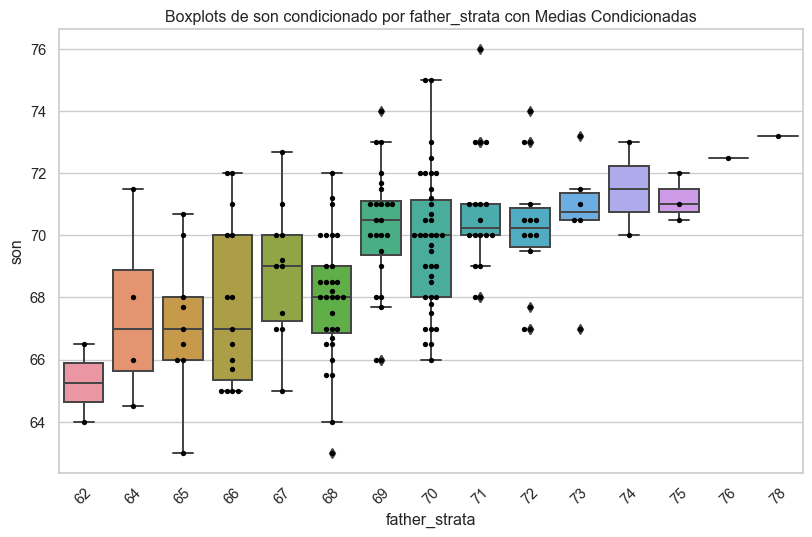

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'galton_heights' con las columnas 'father' y 'son'.

# Crear una nueva columna 'father_strata' con los valores redondeados de 'father'
galton_heights['father_strata'] = galton_heights['father'].round().astype(int)

# Crear el gráfico de boxplots
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.boxplot(data=galton_heights, x='father_strata', y='son')

# Agregar puntos para mostrar las medias condicionadas
sns.swarmplot(data=galton_heights, x='father_strata', y='son', color='black', size=4)

plt.xlabel('father_strata')
plt.ylabel('son')
plt.title('Boxplots de son condicionado por father_strata con Medias Condicionadas')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario

plt.show()


No es de extrañar que los centros de los grupos aumenten con la altura.

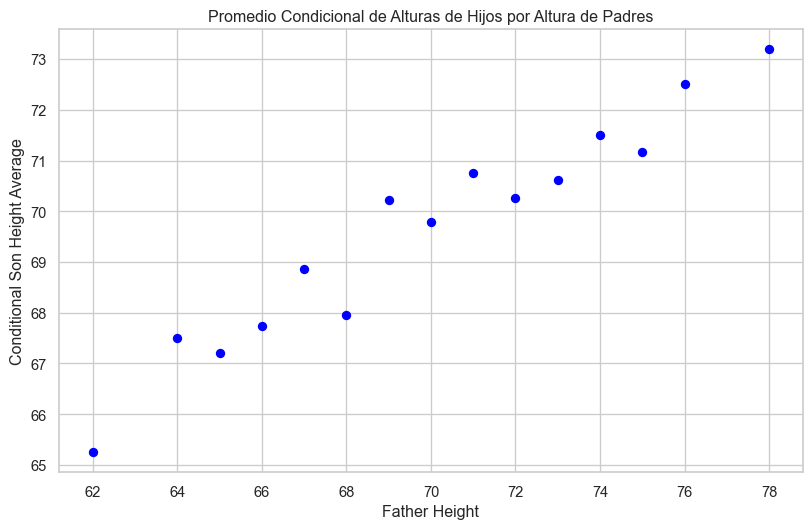

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Redondear los valores de la columna "father"
galton_heights['father'] = galton_heights['father'].round()

# Calcular el promedio condicional de "son" para cada valor de "father"
conditional_avg_by_father = galton_heights.groupby('father')['son'].mean().reset_index()

# Crear un gráfico de puntos para mostrar el promedio condicional por "father"
plt.figure(figsize=(10, 6))
plt.scatter(conditional_avg_by_father['father'], conditional_avg_by_father['son'], color='blue')
plt.xlabel("Father Height")
plt.ylabel("Conditional Son Height Average")
plt.title("Promedio Condicional de Alturas de Hijos por Altura de Padres")
plt.show()


Además, estos centros parecen seguir una relación lineal. A continuación
se presentan los promedios de cada grupo. Si tenemos en cuenta que estos
promedios son variables aleatorias con errores estándar, los datos son
consistentes con estos puntos siguiendo una línea recta:

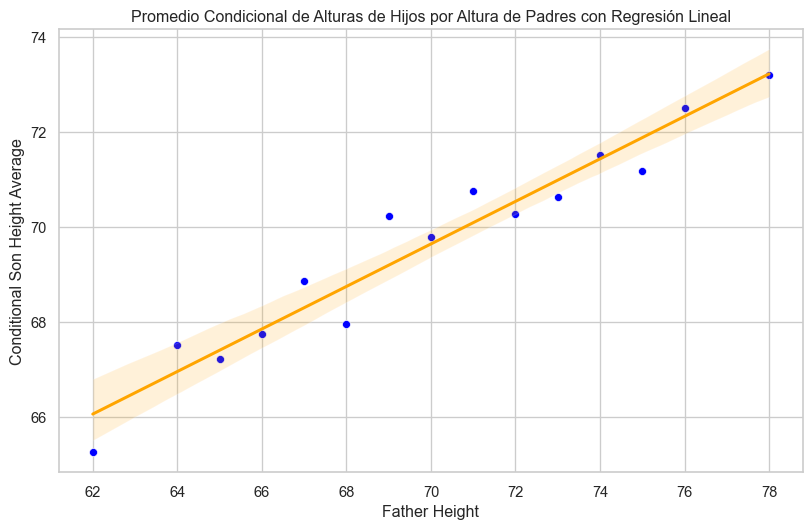

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Redondear los valores de la columna "father"
galton_heights['father'] = galton_heights['father'].round()

# Calcular el promedio condicional de "son" para cada valor de "father"
conditional_avg_by_father = galton_heights.groupby('father')['son'].mean().reset_index()


conditional_avg_by_father.head()


# Crear un gráfico de puntos con ajuste de regresión lineal
plt.figure(figsize=(10, 6))
sns.scatterplot(x='father', y='son', data=conditional_avg_by_father, color='blue')
sns.regplot(x='father', y='son', data=conditional_avg_by_father, scatter=False, color='orange')
plt.xlabel("Father Height")
plt.ylabel("Conditional Son Height Average")
plt.title("Promedio Condicional de Alturas de Hijos por Altura de Padres con Regresión Lineal")
plt.show()

El hecho de que estos promedios condicionales sigan una línea no es una
coincidencia. En la siguiente sección, explicamos que la línea que
siguen estos promedios es lo que llamamos la línea de regresión, que
mejora la precisión de nuestras estimaciones. Sin embargo, no siempre es
apropiado estimar las expectativas condicionales con la línea de
regresión, por lo que también describimos la justificación teórica de
Galton para usar la línea de regresión.

# La línea de regresión

Si estamos prediciendo una variable aleatoria $Y$ conociendo el valor de
otra variable $X=x$ usando una línea de regresión, entonces predecimos
que **para cada desviación estándar, $\sigma_x$ que $x$ aumenta por
encima de la media $\mu_x$, $Y$ incrementa $\rho$ veces la desviación
estándar $\sigma_Y$ sobre el promedio $\mu_Y$**, con $\rho$ la
correlación entre $X$ e $Y$. Por lo tanto, la formula de la regresión
es:

$$
\left( \frac{Y-\mu_Y}{\sigma_Y} \right)=\rho \left(\frac{x-\mu_X}{\sigma_X}\right)
$$

Lo que podemos reescribir como:

$$
Y=\mu_Y + \rho \big(\frac{x-\mu_X}{\sigma_X}\big) \sigma_Y
$$

Si existe una correlación perfecta, la línea de regresión predice un
aumento que corresponde al mismo número de desviacones estándar. Si hay
correlación 0, entonces no usamos $x$ en absoluto en la predicción y
simplemente predecimos el promedio $\mu_Y$. Para valores entre 0 y 1, la
predicción se encuentra en un punto intermedio. Si la correlación es
negativa, predecimos una reducción en lugar de un aumento.

Nótese que si la correlación es positiva e inferior a 1, nuestra
predicción está más cerca (en unidades estándar) de la altura media que
de lo que el valor utilizado para predecir, $x$, está del promedio de
los $x$. Por eso lo llamamos regresión: el hijo regresa a la estatura
media. De hecho, el título del artículo de Galton era: Regresión a la
mediocridad en la estatura hereditaria (Regression toward mediocrity in
hereditary stature.).

Para añadir líneas de regresión a los gráficos, necesitaremos la fórmula
anterior en la forma: $y=b+mx$, con pendiente
$m=\rho \sigma_y / \sigma_x$ e intercepto $b=\mu_y - m \mu_x$

Aquí agregamos la línea de regresión a la data original.

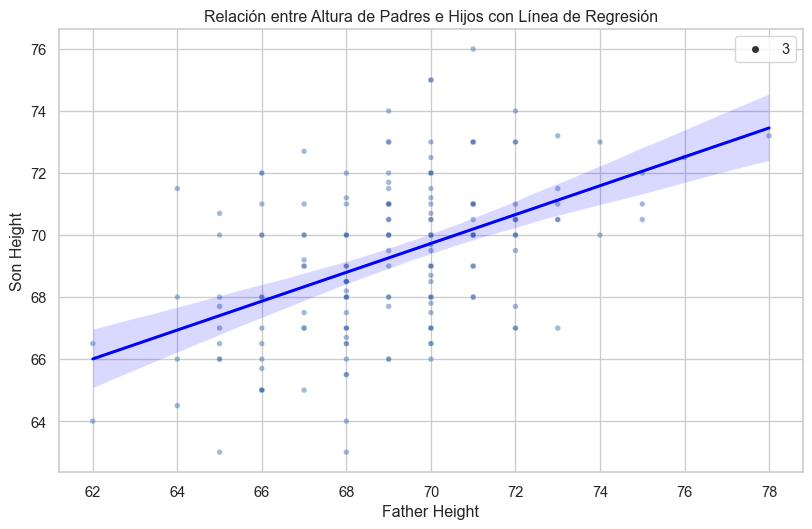

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cálculo de las medias y desviaciones estándar
mu_x = galton_heights['father'].mean()
mu_y = galton_heights['son'].mean()
s_x = galton_heights['father'].std()
s_y = galton_heights['son'].std()

# Cálculo del coeficiente de correlación
r = galton_heights['father'].corr(galton_heights['son'])

# Cálculo de la pendiente y el intercepto para la línea de regresión
m = r * s_y / s_x
b = mu_y - m * mu_x

# Configuración del tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión con línea de regresión
sns.scatterplot(x='father', y='son', data=galton_heights, alpha=0.5, size=3)
sns.regplot(x='father', y='son', data=galton_heights, scatter=False, color='red', line_kws={'color': 'blue'})
plt.xlabel("Father Height")
plt.ylabel("Son Height")
plt.title("Relación entre Altura de Padres e Hijos con Línea de Regresión")
plt.show()

La fórmula de regresión implica que si primero estandarizamos las
variables, es decir, restamos el promedio y dividimos por la desviación
estándar, entonces la línea de regresión tiene intercepto 0 y pendiente
igual a la correlación $\rho$. Aquí está la misma gráfica, pero usando
unidades estándar:

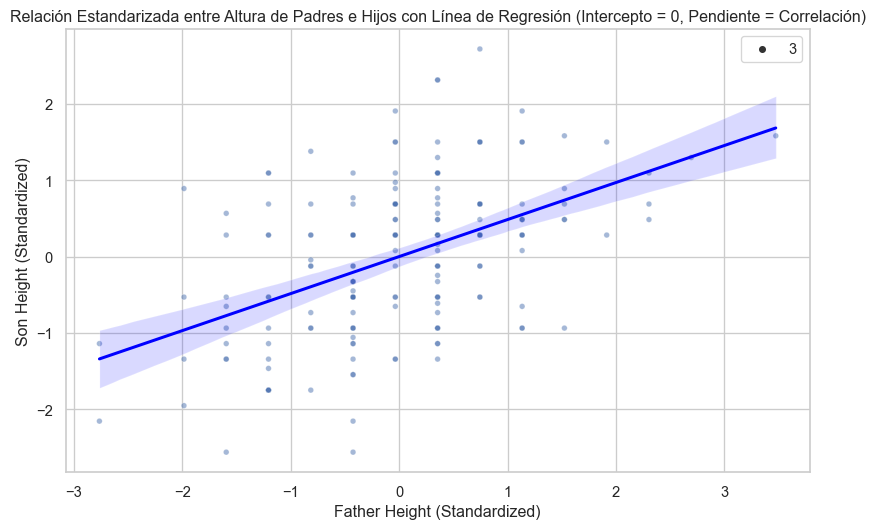

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'galton_heights' con las columnas 'father' y 'son'.

# Estandarizar las variables 'father' y 'son'
galton_heights['father_standardized'] = (galton_heights['father'] - galton_heights['father'].mean()) / galton_heights['father'].std()
galton_heights['son_standardized'] = (galton_heights['son'] - galton_heights['son'].mean()) / galton_heights['son'].std()

# Calcular la correlación de las variables estandarizadas
r = galton_heights['father_standardized'].corr(galton_heights['son_standardized'])

# Configuración del tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión con línea de regresión
sns.scatterplot(x='father_standardized', y='son_standardized', data=galton_heights, alpha=0.5, size=3)
sns.regplot(x='father_standardized', y='son_standardized', data=galton_heights, scatter=False, color='red', line_kws={'color': 'blue'})
plt.xlabel("Father Height (Standardized)")
plt.ylabel("Son Height (Standardized)")
plt.title("Relación Estandarizada entre Altura de Padres e Hijos con Línea de Regresión (Intercepto = 0, Pendiente = Correlación)")
plt.show()

# La regresión mejora la precisión

Comparemos los dos enfoques de predicción que hemos presentado:

1.  Redondee las alturas del padre a la pulgada más cercana,
    estratifique y luego tome el promedio.
2.  Calcula la línea de regresión y úsala para predecir.

Usamos un muestreo de simulación de Monte Carlo $N=50$ familias:

In [34]:
import pandas as pd
import numpy as np

# Supongamos que tienes un DataFrame llamado 'galton_heights' con las columnas 'father' y 'son'.
# Definimos B (número de simulaciones) y N (tamaño de la muestra).

B= 1000
N=50

# Configuración de la semilla aleatoria para reproducibilidad
np.random.seed(10)

# Inicializar listas para almacenar los resultados de las simulaciones
conditional_avg = []
regression_prediction = []

# Realizar simulaciones de Monte Carlo
for _ in range(B):
    # Seleccionar una muestra aleatoria de tamaño N
    dat = galton_heights.sample(n=N)
    
    # Calcular la media condicional (Enfoque 1)
    conditional_avg.append(dat[dat['father'].round() == 72]['son'].mean())
    
    # Calcular la predicción de regresión (Enfoque 2)
    mu_x = dat['father'].mean()
    mu_y = dat['son'].mean()
    s_x = dat['father'].std()
    s_y = dat['son'].std()
    r = dat['father'].corr(dat['son'])
    regression_prediction.append(mu_y + r * (72 - mu_x) / (s_x / s_y))

# Calcular las estadísticas descriptivas de las simulaciones
mean_conditional_avg = np.mean(conditional_avg)
mean_regression_prediction = np.mean(regression_prediction)
std_conditional_avg = np.std(conditional_avg, ddof=1)
std_regression_prediction = np.std(regression_prediction, ddof=1)

# Imprimir resultados
print("Valor Esperado (Media) - Enfoque 1 (Media Condicional):", mean_conditional_avg)
print("Valor Esperado (Media) - Enfoque 2 (Predicción de Regresión):", mean_regression_prediction)
print("Error Estándar - Enfoque 1 (Media Condicional):", std_conditional_avg)
print("Error Estándar - Enfoque 2 (Predicción de Regresión):", std_regression_prediction)

Valor Esperado (Media) - Enfoque 1 (Media Condicional): nan
Valor Esperado (Media) - Enfoque 2 (Predicción de Regresión): 70.67343109843348
Error Estándar - Enfoque 1 (Media Condicional): nan
Error Estándar - Enfoque 2 (Predicción de Regresión): 0.36595992279839545

Aunque el valor esperado de estas dos variables aleatorias es casi el
mismo, el error estándar para la predicción de regresión es
sustancialmente menor.

Por lo tanto, la línea de regresión es mucho más estable que la media
condicional. Hay una razón intuitiva para ello. El promedio condicional
se calcula en un subconjunto relativamente pequeño: los padres que miden
alrededor de 72 pulgadas de alto. De hecho, en algunas de las
permutaciones no tenemos datos. La regresión siempre utiliza todos los
datos.

Entonces, ¿por qué no usar siempre la regresión para predecir? Porque no
siempre es apropiado. Por ejemplo, Anscombe proporcionó casos en los que
los datos no tienen una relación lineal. Entonces, ¿está justificado
usar la línea de regresión para predecir? Galton contestó esto de forma
afirmativa para los datos de altura.

# Definición matemática

El modelo de regresión lineal (Legendre, Gauss, Galton y Pearson)
considera que, dado un conjunto de observaciones
$\{y_i, x_{i1},...,x_{np}\}^{n}_{i=1}$ , la media $𝜇$ de la variable
respuesta $𝑦$ se relaciona de forma lineal con la o las variables
regresoras $𝑥_1$ … $x_p$ acorde a la ecuación:

$\mu_y = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + ... + \beta_p x_{p}$

El resultado de esta ecuación se conoce como la línea de regresión
poblacional, y recoge la relación entre los predictores y la media de la
variable respuesta.

Otra definición que se encuentra con frecuencia en los libros de
estadística es:

$y_i= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip} +\epsilon_i$

En este caso, se está haciendo referencia al valor de 𝑦 para una
observación 𝑖 concreta. El valor de una observación puntual nunca va a
ser exactamente igual al promedio, de ahí que se añada el término de
error $\epsilon$.

En ambos casos, la interpretación de los elementos del modelo es la
misma:

-   $\beta_0$: es la ordenada en el origen, se corresponde con el valor
    promedio de la variable respuesta $y$ cuando todos los predictores
    son cero.

-   $\beta_j$: es el efecto promedio que tiene sobre la variable
    respuesta el incremento en una unidad de la variable predictora
    $x_j$, manteniéndose constantes el resto de variables. Se conocen
    como coeficientes de regresión.

-   $\epsilon$: es el residuo o error, la diferencia entre el valor
    observado y el estimado por el modelo. Recoge el efecto de todas
    aquellas variables que influyen en $y$ pero que no se incluyen en el
    modelo como predictores.

En la gran mayoría de casos, los valores $\beta_0$ y $\beta_j$
poblacionales se desconocen, por lo que, a partir de una muestra, se
obtienen sus estimaciones $\hat{\beta_0}$ y $\hat{\beta_j}$. **Ajustar
el modelo consiste en estimar, a partir de los datos disponibles, los
valores de los coeficientes de regresión que maximizan la verosimilitud
(likelihood), es decir, los que dan lugar al modelo que con mayor
probabilidad puede haber generado los datos observados.**

El método empleado con más frecuencia es el ajuste por mínimos cuadrados
ordinarios (OLS), que identifica como mejor modelo la recta (o plano si
es regresión múltiple) que minimiza la suma de las desviaciones
verticales entre cada dato de entrenamiento y la recta, elevadas al
cuadrado.

# Interpretación del modelo

Los principales elementos que hay que interpretar en un modelo de
regresión lineal son los coeficientes de los predictores:

-   $\beta_0$ es la ordenada en el origen o intercept, se corresponde
    con el valor esperado de la variable respuesta $y$, cuando todos los
    predictores son cero.

-   $\beta_j$ los coeficientes de regresión parcial de cada predictor
    **indican el cambio promedio esperado de la variable respuesta 𝑦 al
    incrementar en una unidad de la variable predictora $x_j$,
    manteniéndose constantes el resto de variables. (“Ceteris
    paribus”))**

La magnitud de cada coeficiente parcial de regresión depende de las
unidades en las que se mida la variable predictora a la que corresponde,
por lo que su magnitud no está asociada con la importancia de cada
predictor.

Para poder determinar qué impacto tienen en el modelo cada una de las
variables, se emplean los coeficientes parciales estandarizados, que se
obtienen al estandarizar (sustraer la media y dividir entre la
desviación estándar) las variables predictoras previo ajuste del modelo.
En este caso, $\beta_0$ se corresponde con el valor esperado de la
variable respuesta cuando todos los predictores se encuentran en su
valor promedio, y $\beta_j$ el cambio promedio esperado de la variable
respuesta al incrementar en una desviación estándar la variable
predictora $x_j$, manteniéndose constantes el resto de variables.

Si bien los coeficientes de regresión suelen ser el primer objetivo de
la interpretación de un modelo lineal, existen muchos otros aspectos
(significancia del modelo en su conjunto, significancia de los
predictores, condición de normalidad…etc.). Estos últimos suelen ser
tratados con poco detalle cuando el único objetivo del modelo es
realizar predicciones, sin embargo, son muy relevantes si se quiere
realizar inferencia, es decir, explicar las relaciones entre los
predictores y la variable respuesta.

# Significado “lineal”

El término “lineal” en los modelos de regresión hace referencia al hecho
de que los parámetros se incorporan en la ecuación de forma lineal, no a
que necesariamente la relación entre cada predictor y la variable
respuesta tenga que seguir un patrón lineal.

La siguiente ecuación muestra un modelo lineal en el que el predictor 𝑥1
no es lineal respecto a y:

$y = \beta_0 + \beta_1x_1 + \beta_2log(x_1) + \epsilon$

<img src="./img/img_sesion3/im1.png" width="400">

En contraposición, el siguiente no es un modelo lineal:

$y = \beta_0 + \beta_1x_1^{\beta_2} + \epsilon$

En ocasiones, algunas relaciones no-lineales pueden transformarse de
forma que se pueden expresar de manera lineal:

-   Modelo no-lineal a estimar: $y = \beta_0x_1^{\beta_1}\epsilon$

-   Solucion: pasamos todo a logaritmos:

$log(y)=log(\beta_0) + \beta_1log(x_1) + log(\epsilon)$

$y^{'}=\beta_0^{'}+\beta_1x_1^{'} + \epsilon^{'}$

-   Estimar el modelo y extraer los coeficientes.

-   Volvera a la forma funcional incial exponenciando los logaritmos.

    -   $\beta_1$ es explicito.
    -   $\beta_0^{'}=log(\beta_0)=> exp(log(\beta_0))$

### Distribución normal bivariable (avanzado)

https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal_multivariante

La correlación y la pendiente de regresión son estadísticas de resumen
ampliamente utilizadas, pero a menudo se utilizan o interpretan
erróneamente. Los ejemplos de Anscombe proporcionan casos excesivamente
simplificados de conjuntos de datos en los que resumir con correlación
sería un error. Pero hay muchos más ejemplos de la vida real.

La principal forma en que motivamos el uso de la correlación involucra
lo que se llama la distribución normal bivariada.

Cuando un par de variables aleatorias son aproximadas por la
distribución normal bivariada, las gráficas de dispersión se ven como
óvalos. Pueden ser delgadas (alta correlación) o en forma de círculo
(sin correlación).

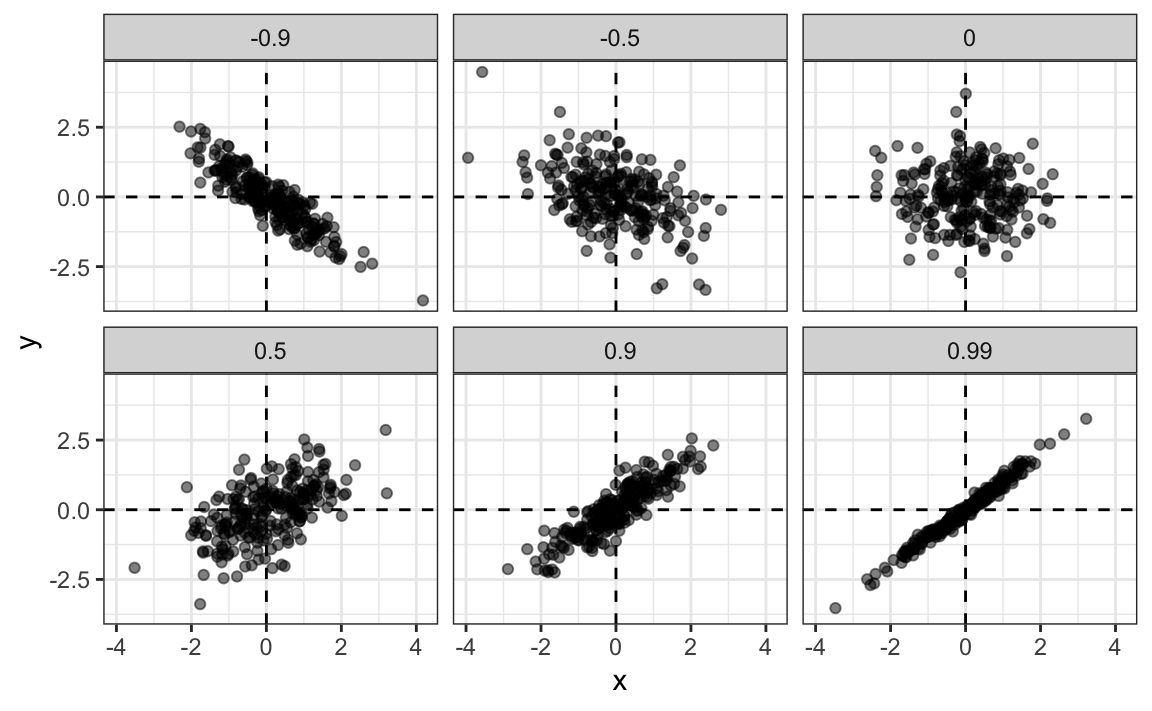

Una forma más técnica de definir la distribución normal bivariada es la
siguiente: si $X$ es una variable aleatoria normalmente distribuida, $Y$
es también una variable aleatoria normalmente distribuida, y la
distribución condicional de $Y$ para cualquier $X=x$ es aproximadamente
normal, entonces el par es aproximadamente normal bivariado.

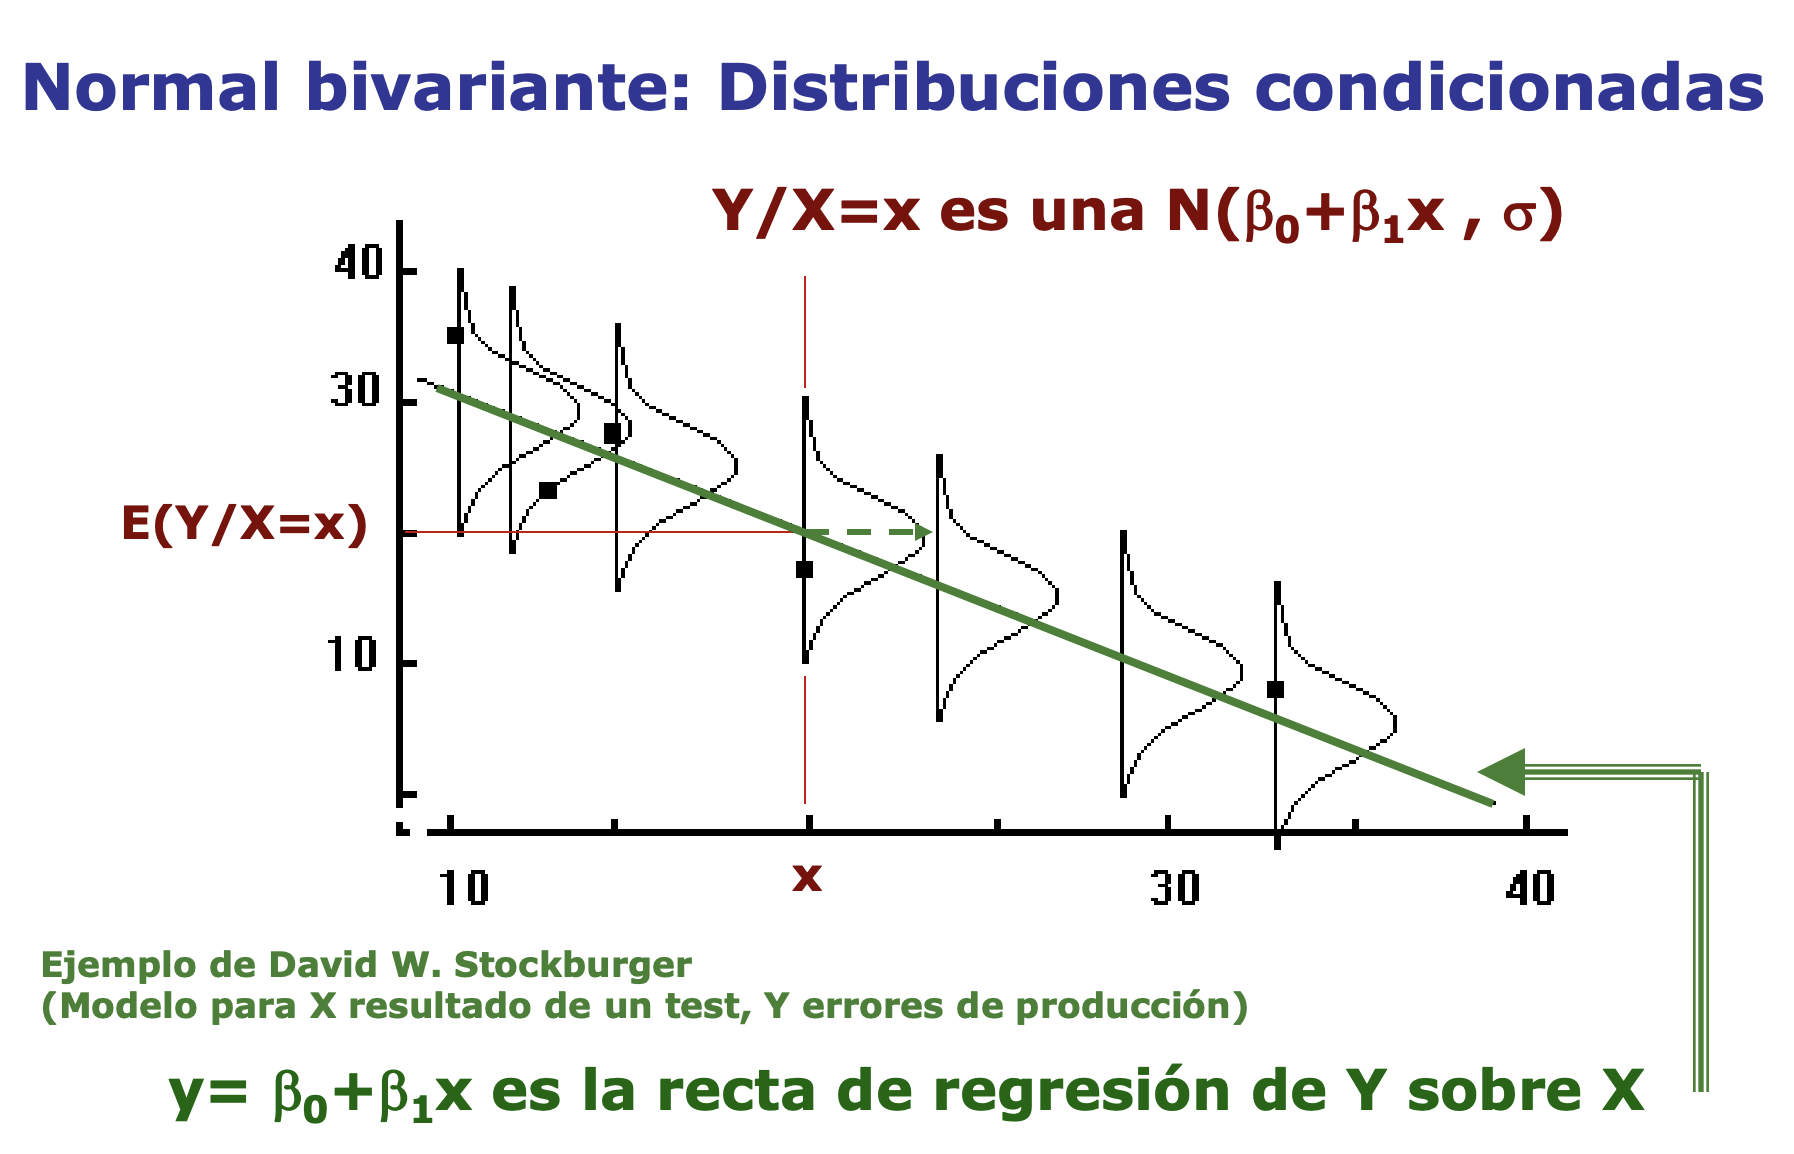

Si pensamos que los datos de altura están bien aproximados por la
distribución normal bivariada, entonces deberíamos ver la aproximación
normal para cada estrato. Aquí estratificamos las alturas del hijo por
las alturas paternas estandarizadas y vemos que la suposición parece
mantenerse:

In [35]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'galton_heights' con las columnas 'father' y 'son'.

# Estandarizar las alturas del padre y crear una columna 'z_father'
galton_heights['z_father'] = np.round((galton_heights['father'] - galton_heights['father'].mean()) / galton_heights['father'].std())

# Filtrar las alturas del padre dentro del rango [-2, 2]
galton_heights_filtered = galton_heights[galton_heights['z_father'].isin([-2, -1, 0, 1, 2])]


galton_heights_filtered.head()

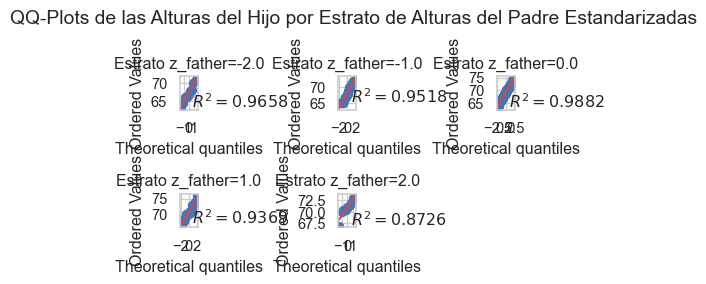

In [36]:
# Configurar el tamaño de la figura y el estilo de Seaborn
plt.figure(figsize=(5, 3))
sns.set(style='whitegrid')

# Crear gráficos QQ-plot utilizando un bucle for para cada estrato
for z_father_value, group_data in galton_heights_filtered.groupby('z_father'):
    plt.subplot(2, 3, int(z_father_value) + 3)  # Convertir z_father_value a entero
    stats.probplot(group_data['son'], plot=plt, fit=True, rvalue=True)
    plt.title(f"Estrato z_father={z_father_value}")

# Ajustar títulos y etiquetas
plt.suptitle("QQ-Plots de las Alturas del Hijo por Estrato de Alturas del Padre Estandarizadas")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Ahora volvemos a definir la correlación. Galton utilizó estadísticas
matemáticas para demostrar que, cuando dos variables siguen una
distribución normal bivariada, el cálculo de la línea de regresión es
equivalente al cálculo de las expectativas condicionales. Esto implica
que, si nuestros datos son aproximadamente bivariados, la línea de
regresión es equivalente a la probabilidad condicional. Por lo tanto,
podemos obtener una estimación mucho más estable del valor de
expectación condicional, encontrando la línea de regresión y usándola
para predecir.

En resumen, si nuestros datos son aproximadamente bivariados, entonces
la expectativa condicional, la mejor predicción de $Y$ dado que
conocemos el valor de $X$ está dada por la línea de regresión.

$$
Y_i=\beta_0 + \beta_1 x_i +U_i
$$

De aquí facilmente podemos intuir algunos de los supuestos que deben
cumplirse al implementar una regresión (y que estudiaremos en detalle en
la siguiente sesion):

1.  Normalidad: $u_i \sim Normal$

2.  Linealidad: Los residuos se distribuyen sin forma alrededor del cero
    $E(u_i)=0$

3.  Homocedasticidad: La variabilidad de los residuos es similar para
    todos los $x_i$, $V(u_i)=\sigma^2$

4.  No existen resudios atípicos.

5.  Independecia: Los residuos, ($u_i$), son independientes

## Varianza explicada

La teoría de la normalidad bivariada también nos dice que la desviación
estándar de la distribución condicional descrita anteriormente es:

$$
SD(Y|X=x)=\sigma_Y\sqrt{1-\rho^2}
$$

Para ver por qué esto es intuitivo, note que sin condicionamiento,
$SD(Y)=\sigma_Y$ estamos viendo la variabilidad de todos los hijos. Pero
una vez que los condicionamos, sólo estamos viendo la variabilidad de
los hijos con un padre que mide 72 pulgadas de alto. Este grupo tenderá
a ser “algo más” alto (que el promedio), por lo que la desviación
estándar se reduce.

Específicamente, se reduce a $\sqrt{1-\rho^2}=\sqrt{1-0.25}=0.86$ de lo
que era originalmente. Podríamos decir que la estatura del padre
“explica” el 14% de la variabilidad de estatura del hijo.

La frase “$X$ explica tal o cual porcentaje de la variabilidad” se
utiliza comúnmente en papers académicos. En este caso, este porcentaje
se refiere realmente a la desviación (SD al cuadrado). Por lo tanto, si
los datos son normales bivariados, la varianza se reduce en $1-\rho^2$
por lo que decimos que $X$ explica $1-(1-\rho^2)=\rho^2$ (la correlación
al cuadrado) de la varianza.

Pero es importante recordar que la afirmación de “varianza explicada”
sólo tiene sentido cuando los datos se aproximan mediante una
distribución normal bivariada.

## Cuidado: hay dos líneas de regresión

Calculamos una línea de regresión para predecir la altura del hijo desde
la altura del padre.

Usamos estos cálculos:

In [37]:
import numpy as np

# Calcular la media de las alturas del padre
mu_x = galton_heights['father'].mean()

# Calcular la media de las alturas del hijo
mu_y = galton_heights['son'].mean()

# Calcular la desviación estándar de las alturas del padre
s_x = galton_heights['father'].std()

# Calcular la desviación estándar de las alturas del hijo
s_y = galton_heights['son'].std()

# Calcular el coeficiente de correlación entre las alturas del padre y el hijo
r = galton_heights['father'].corr(galton_heights['son'])



print(r)
print(s_x)
print(s_y)
print(mu_x)
print(mu_y)

0.48444410186382786
2.5644170903922188
2.463730629482591
69.08938547486034
69.30558659217877

In [38]:
# Calcular la pendiente de la primera línea de regresión
m_1 = r * s_y / s_x

# Calcular el intercepto de la primera línea de regresión
b_1 = mu_y - m_1 * mu_x

print("pendiente", m_1)
print("constante", b_1)

pendiente 0.46542341981177066
constante 37.1497685317756

Lo que nos da la función $E(Y|X=x)=28,8+0.44x$.

¿Y si queremos predecir la estatura del padre basándonos en la del hijo?

Es importante saber que esto no se determina calculando la función
inversa!.

Necesitamos computar $E(X∣Y=y)$. Dado que los datos son aproximadamente
normales bivariados, la teoría descrita anteriormente nos dice que esta
expectativa condicional seguirá una línea con pendiente e intercepto:

In [39]:
m_2 = r * s_x / s_y
b_2 = mu_x - m_2 * mu_y

print("pendiente", m_2)
print("constante", b_2)

pendiente 0.5042421112490729
constante 34.142590170264675

De nuevo vemos una regresión a la media: la predicción para el padre
está más cerca de la media del padre que lo que estan las alturas del
hijo $y$ al promedio del hijo.

Aquí hay un gráfico que muestra las dos líneas de regresión:

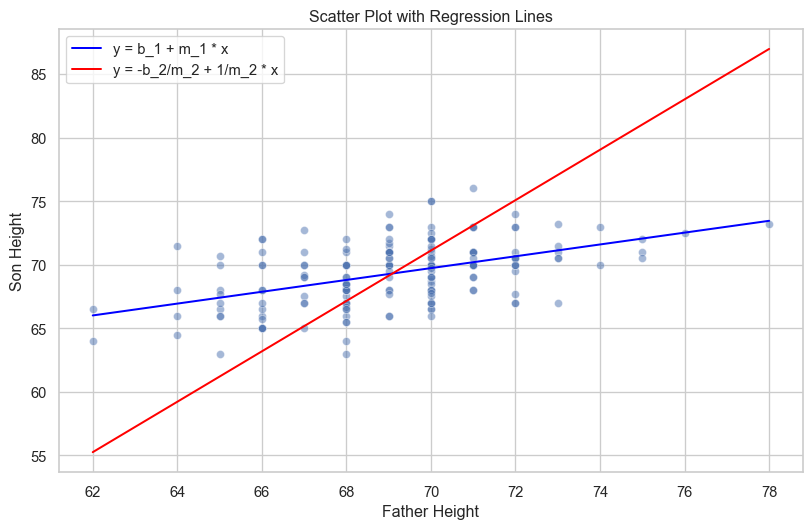

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico utilizando Matplotlib y Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=galton_heights, x='father', y='son', alpha=0.5)
plt.plot(galton_heights['father'], b_1 + m_1 * galton_heights['father'], color='blue', label='y = b_1 + m_1 * x')
plt.plot(galton_heights['father'], -b_2/m_2 + 1/m_2 * galton_heights['father'], color='red', label='y = -b_2/m_2 + 1/m_2 * x')
plt.legend()
plt.xlabel('Father Height')
plt.ylabel('Son Height')
plt.title('Scatter Plot with Regression Lines')
plt.show()

con azul para la predicción de las alturas del hijo con las alturas del
padre y rojo para la predicción de las alturas del padre con las alturas
del hijo.

> **Taller aplicacción 2: Altura de padres e hijos**
>
> 1.  Cargue los datos de `GaltonFamilies` desde el HistData. Los niños
>     de cada familia están ordenados por sexo y luego por estatura.
>     Cree un conjunto de datos llamado `galton_heights` seleccionando
>     niños y niñas al azar. (HINT: use `sample`).
>
> 2.  Haga una gráfica para las alturas entre madres e hijas, madres e
>     hijos, padres e hijas, y padres e hijos.
>
> 3.  Calcular la correlación para alturas entre madres e hijas, madres
>     e hijos, padres e hijas, y padres e hijos.
>
> 4.  Plotear las correalciones sobre cada grafica defindia en 2 (linea
>     de regresion).
>
> 5.  Obtener el modelo de regresión e interpretar los coeficientes.